In [229]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [230]:
df1 =pd.read_csv('alldatabatting.csv')
df1.head()

,Unnamed: 0,Name,runs,balls,fours,sixes,sr
0,0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984
1,1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332
2,2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259
3,3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626
4,4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472


In [231]:
df2 =pd.read_csv('alldatabowling.csv')
df2.head() 

,Unnamed: 0,Name,Over,Maidens,Runs_Conceded,Wickets,Dots
0,0,Shakib Al Hasan,96.5,0,769,20,177
1,1,Shivam Mavi,86.1,2,715,25,218
2,2,Lockie Ferguson,79.5,1,648,24,197
3,3,Varun Chakravarthy,123.0,0,839,36,268
4,4,Sunil Narine,258.2,1,1889,58,564


In [232]:
print("Batting Data Info:")
df1.info()
print("\nDuplicated rows in Batting Data:", df1[df1.duplicated()].shape[0])

Batting Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  240 non-null    int64  
 1   Name        240 non-null    object 
 2   runs        239 non-null    float64
 3   balls       239 non-null    float64
 4   fours       239 non-null    float64
 5   sixes       239 non-null    float64
 6   sr          239 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.2+ KB

Duplicated rows in Batting Data: 0


In [233]:
print("Bowling Data Info:")
df2.info()
print("\nDuplicated rows in Bowling Data:", df2[df2.duplicated()].shape[0])

Bowling Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     214 non-null    int64  
 1   Name           214 non-null    object 
 2   Over           214 non-null    float64
 3   Maidens        214 non-null    int64  
 4   Runs_Conceded  214 non-null    int64  
 5   Wickets        214 non-null    int64  
 6   Dots           214 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.8+ KB

Duplicated rows in Bowling Data: 0


In [234]:
df1.drop(columns='Unnamed: 0',inplace=True)
df2.drop(columns='Unnamed: 0',inplace=True)

In [235]:
df1.shape
print(f"The batting dataset has {df1.shape[0]} rows, and {df1.shape[1]} columns.")

The batting dataset has 240 rows, and 6 columns.


In [236]:
df2.shape
print(f"The bowling dataset has {df2.shape[0]} rows, and {df2.shape[1]} columns.")

The bowling dataset has 214 rows, and 6 columns.


In [237]:
df1.isna().sum()

Name     0
runs     1
balls    1
fours    1
sixes    1
sr       1
dtype: int64

In [238]:
df1=df1.dropna(axis=0)

In [239]:
df2.isna().sum()

Name             0
Over             0
Maidens          0
Runs_Conceded    0
Wickets          0
Dots             0
dtype: int64

In [240]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
runs,239.0,309.054393,497.782150,0.0,13.000000,65.000000,338.000000,2548.000000
balls,239.0,233.150628,362.215803,0.0,16.500000,55.000000,287.000000,1823.000000
fours,239.0,26.903766,46.269524,0.0,1.000000,4.000000,29.500000,253.000000
sixes,239.0,12.874477,21.710493,0.0,0.000000,2.000000,14.000000,110.000000
sr,239.0,104.937965,47.402836,0.0,76.470588,117.307692,133.471646,333.333333


In [241]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Over,214.0,53.475234,64.340241,0.1,7.0,25.0,79.875,302.0
Maidens,214.0,0.387850,0.936501,0.0,0.0,0.0,0.000,6.0
Runs_Conceded,214.0,441.677570,499.615245,2.0,69.5,221.5,686.250,2035.0
Wickets,214.0,15.168224,19.710575,0.0,1.0,6.0,22.750,104.0
Dots,214.0,117.775701,150.756796,0.0,11.0,48.5,176.500,760.0


## BATTING DATA

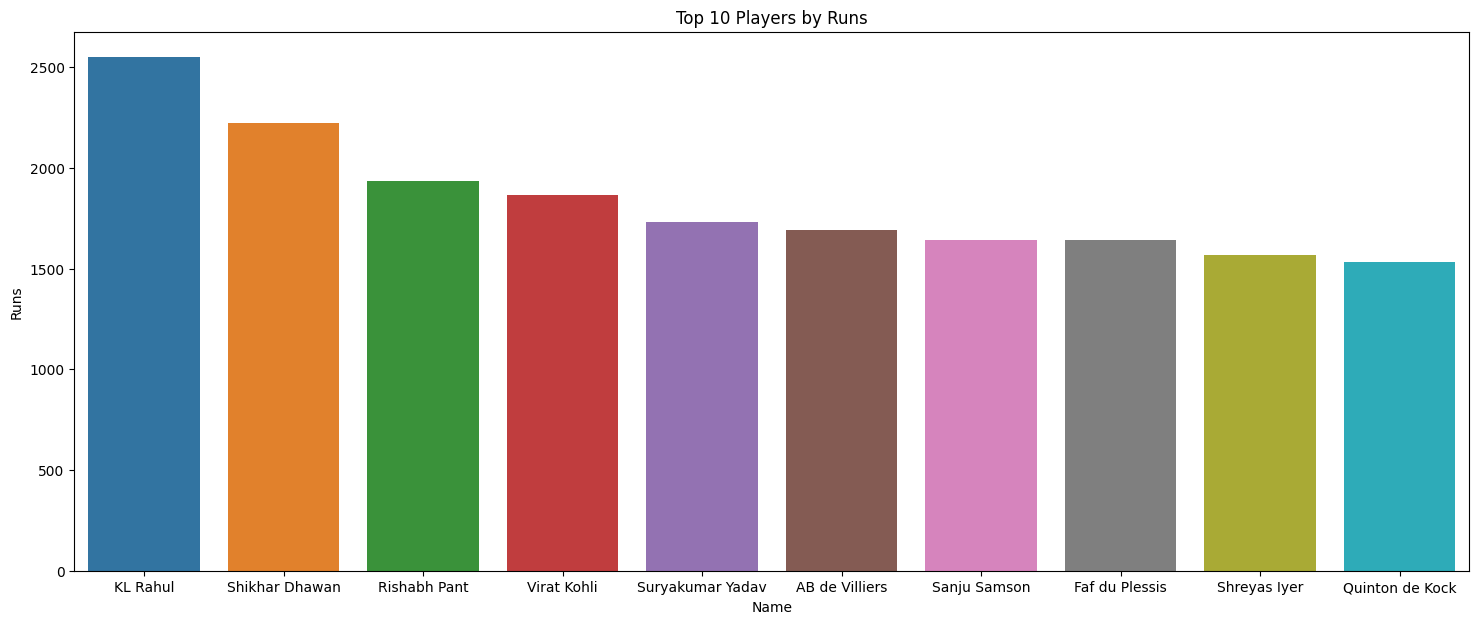

In [242]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Name')['runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

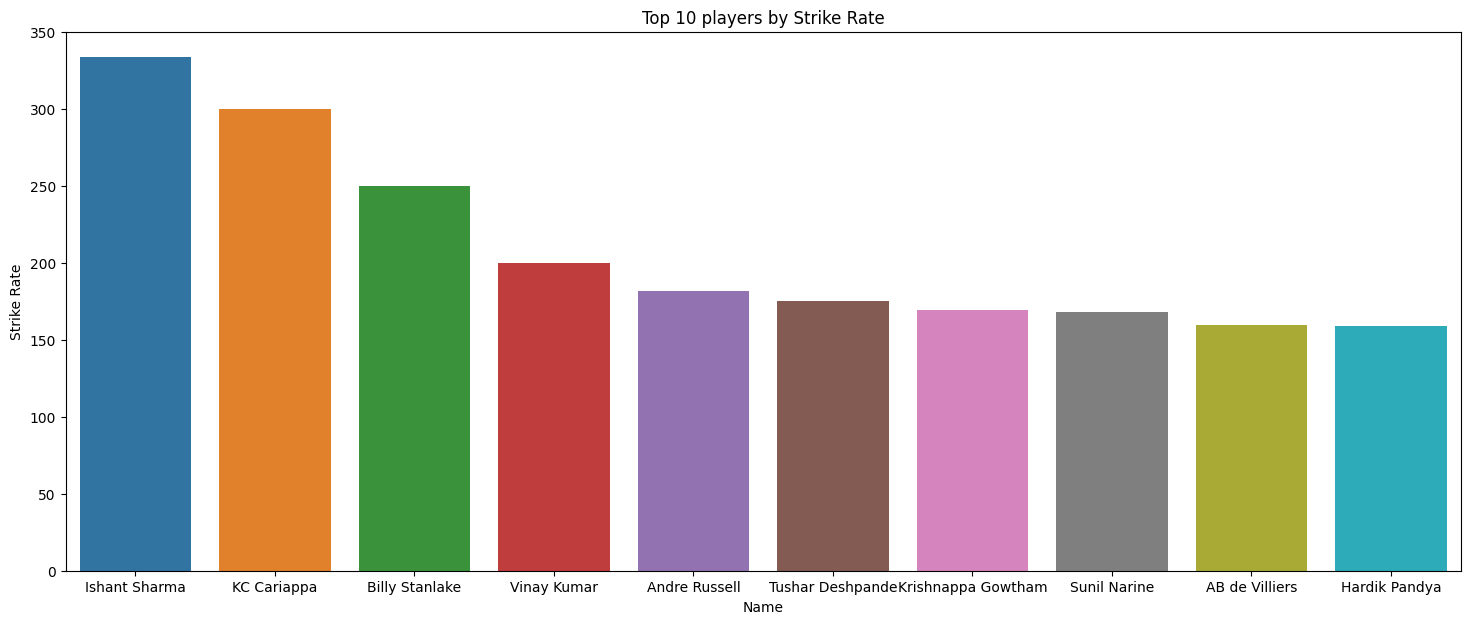

In [243]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Name')['sr'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Strike Rate']
sns.barplot(data= b1 , x= 'Name' , y ='Strike Rate')
plt.title("Top 10 players by Strike Rate");

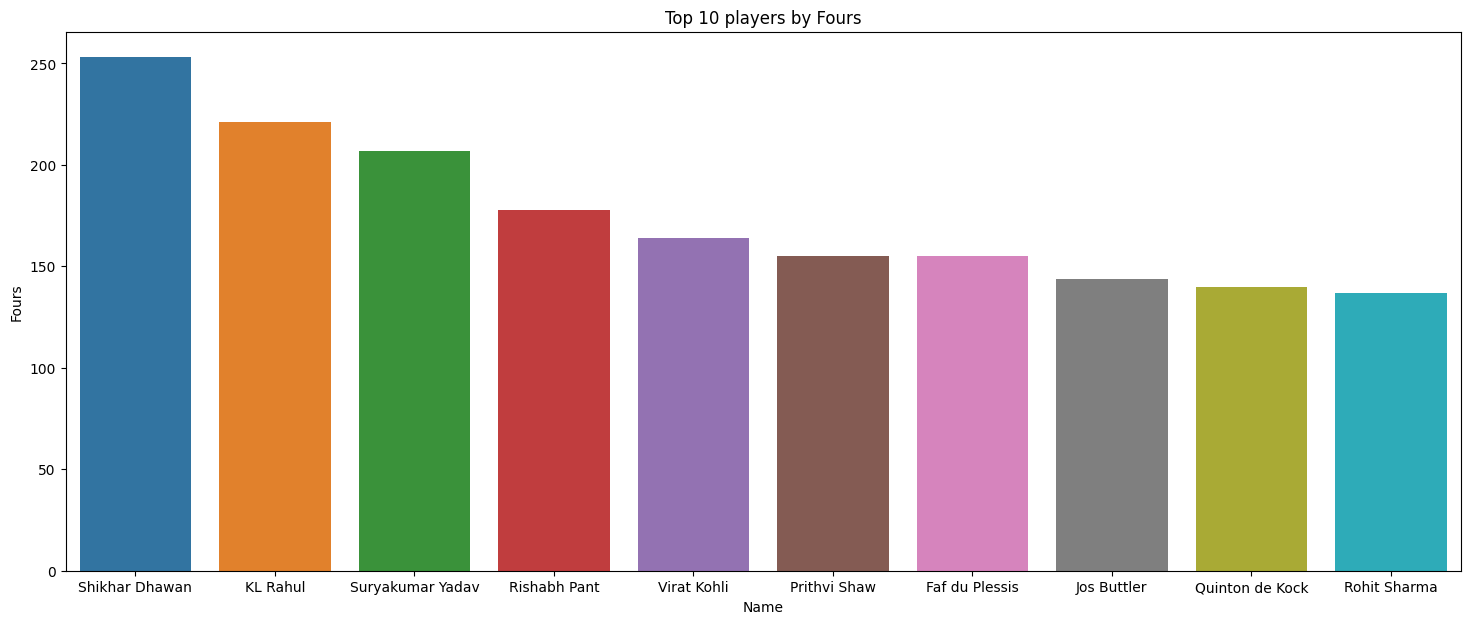

In [244]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Name')['fours'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Fours']
sns.barplot(data= b1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

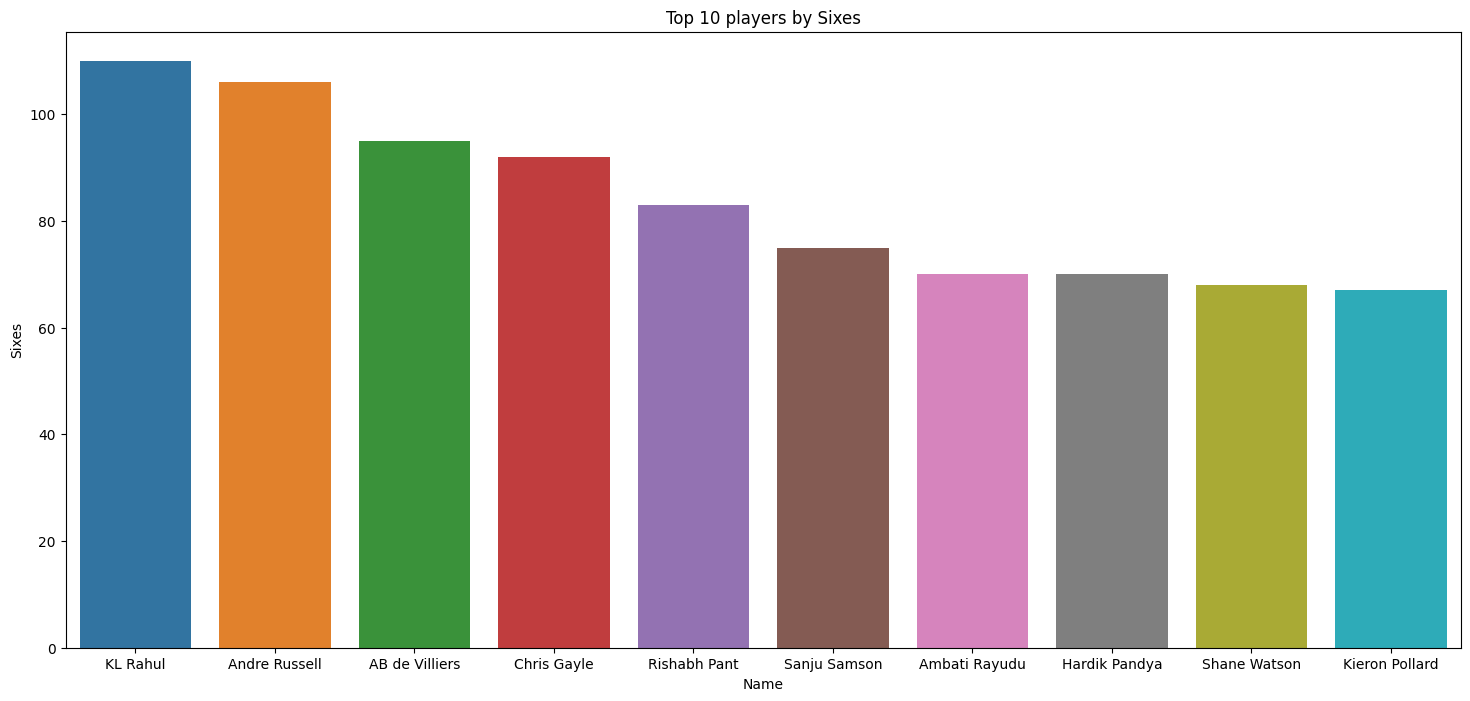

In [245]:
plt.figure(figsize=(18,8))
b1=df1.groupby('Name')['sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

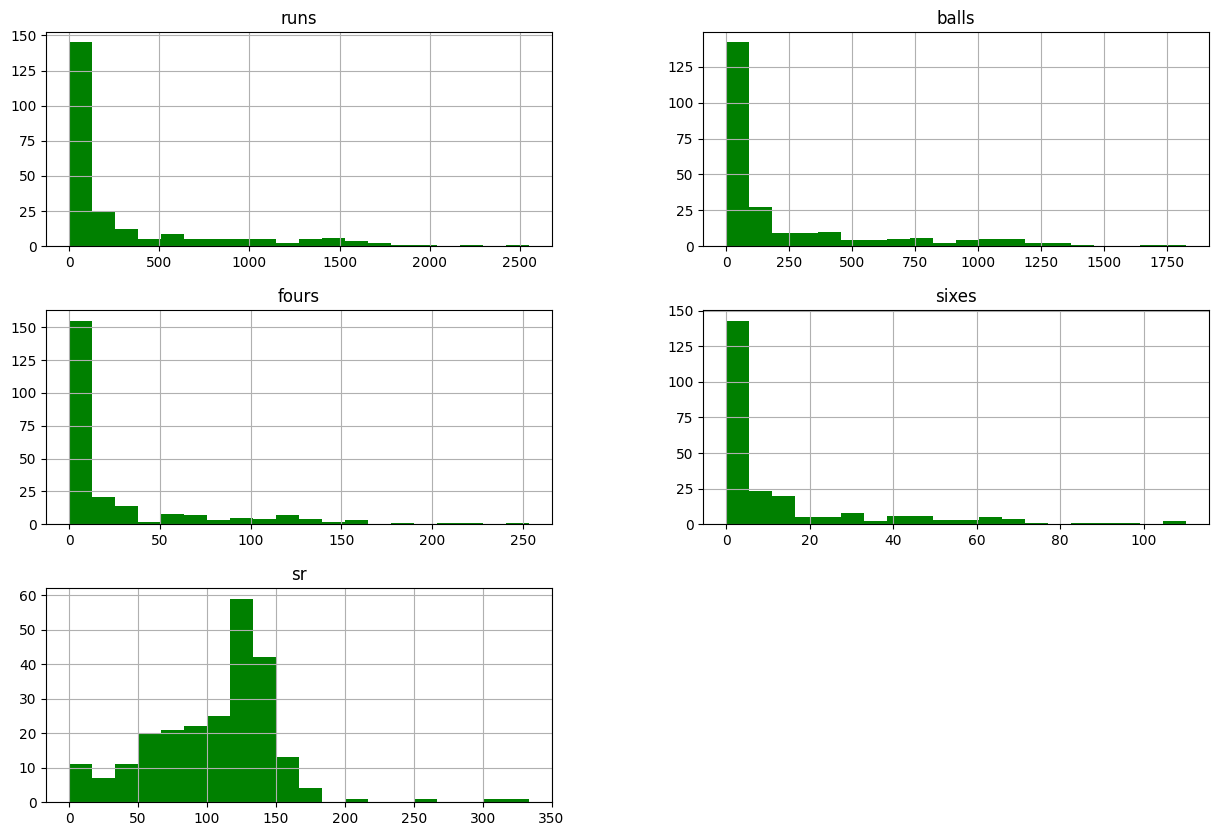

In [246]:
df1.hist(bins = 20, figsize = (15, 10), color = 'green')
plt.show()

[Text(0.5, 1.0, 'Distribution of balls')]

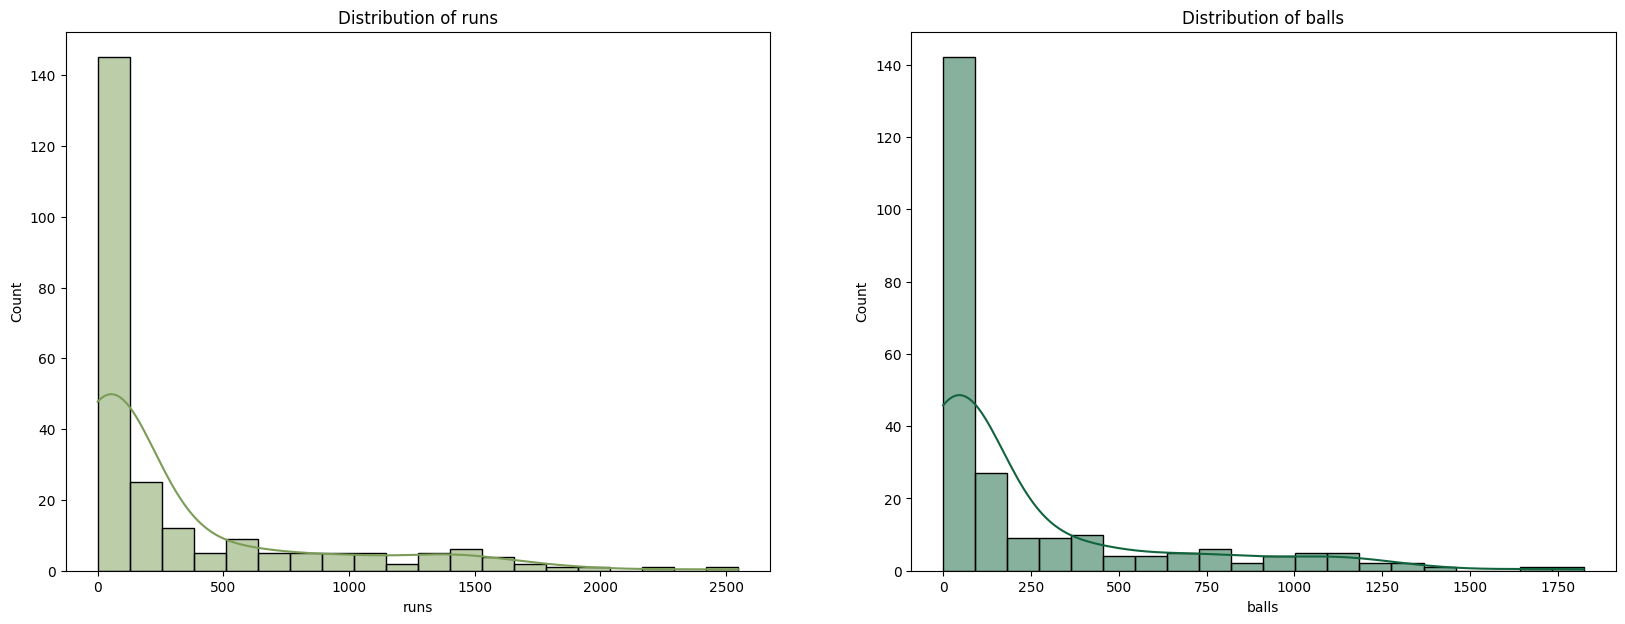

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["runs"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of runs")

sns.histplot(ax = axes[1], x = df1["balls"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of balls")


[Text(0.5, 1.0, 'Distribution of sixes')]

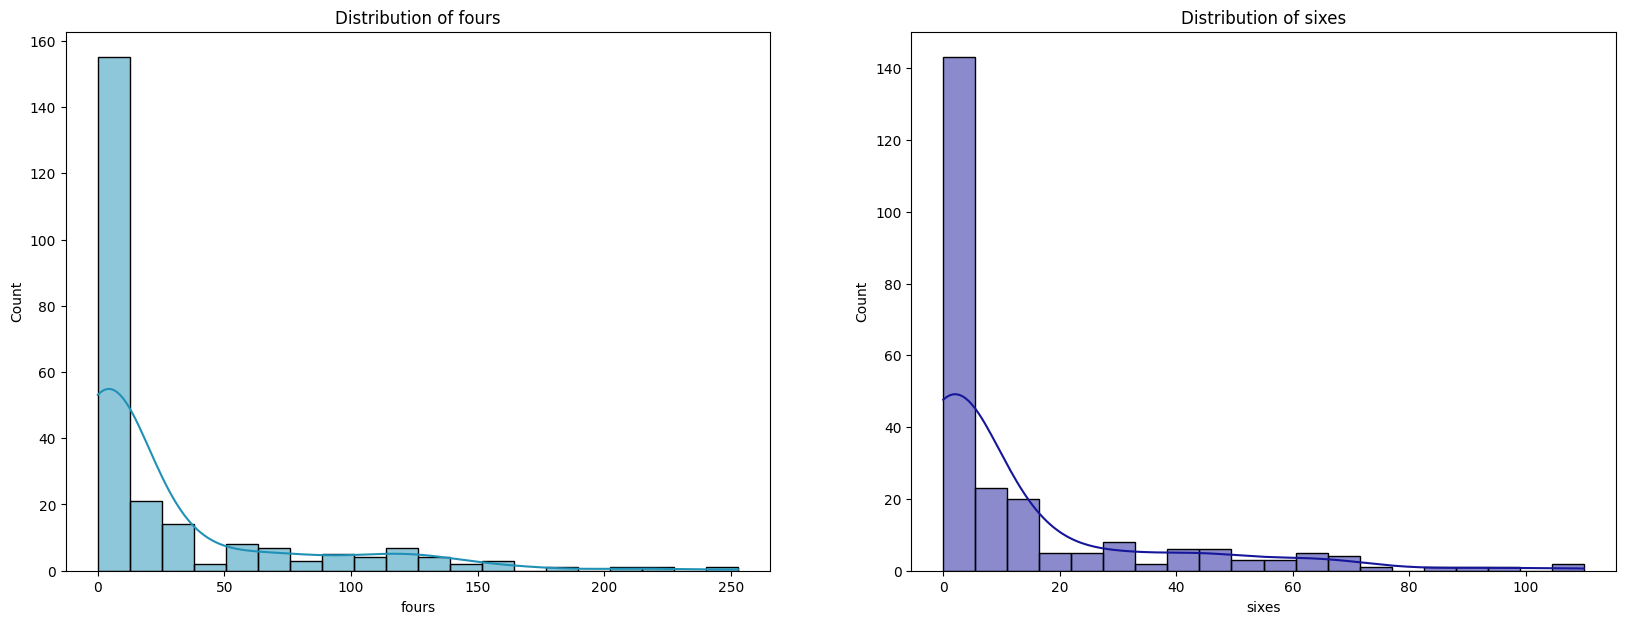

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["fours"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of fours")

sns.histplot(ax = axes[1], x = df1["sixes"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of sixes")

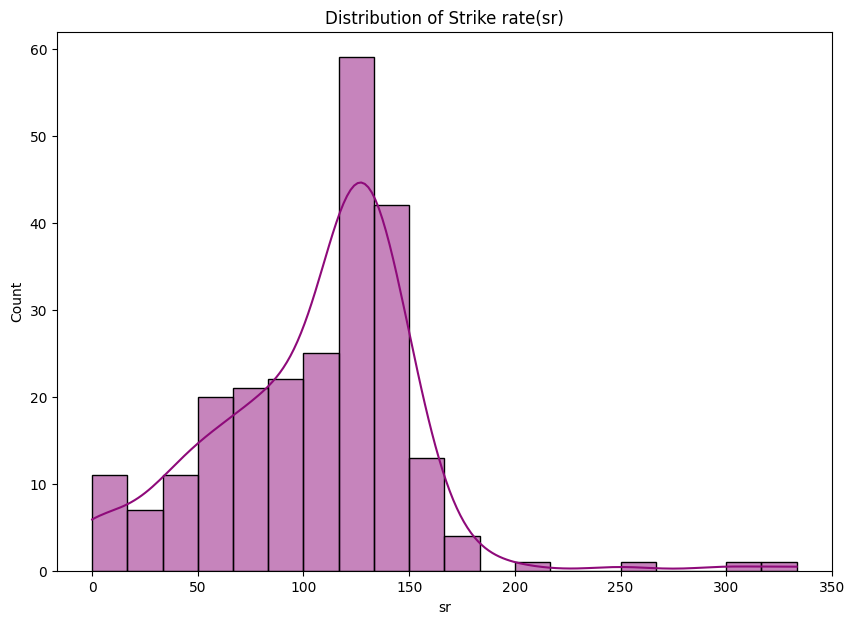

In [249]:
plt.figure(figsize=(10, 7))  

sns.histplot(df1["sr"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Strike rate(sr)")
plt.show()


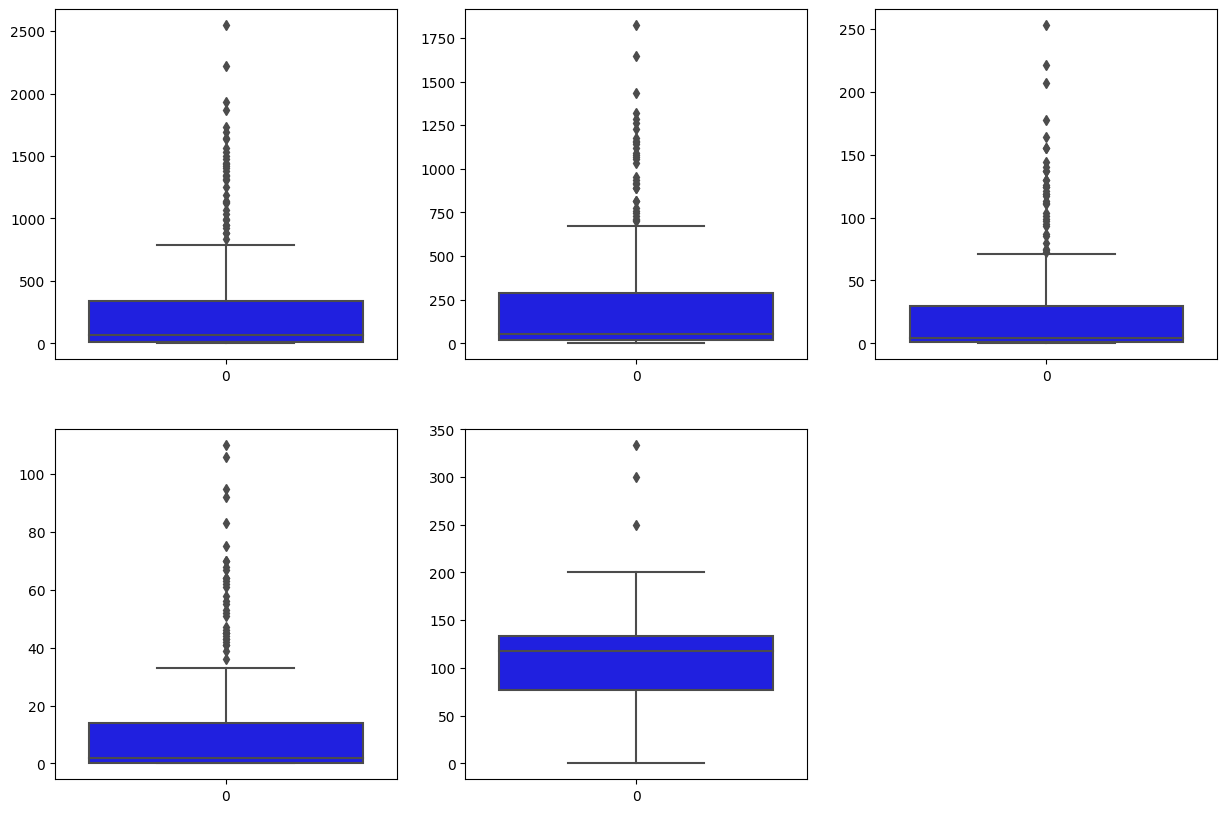

In [250]:
plt.figure(figsize=(15, 10))
col = 1
for i in df1.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(df1[i],color='blue')
    col += 1

In [251]:
df1.shape

(239, 6)

In [252]:
def remove_outliers_iqr(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]


df= remove_outliers_iqr(df1)

In [253]:
df.shape

(196, 6)

### The outliers are genuine observations, especially in the context of sports performance data, these are crucial for accurate analysis and insights.

## Correlation

In [254]:
df_h1 = df1.copy()
df_db1 = df1.copy()


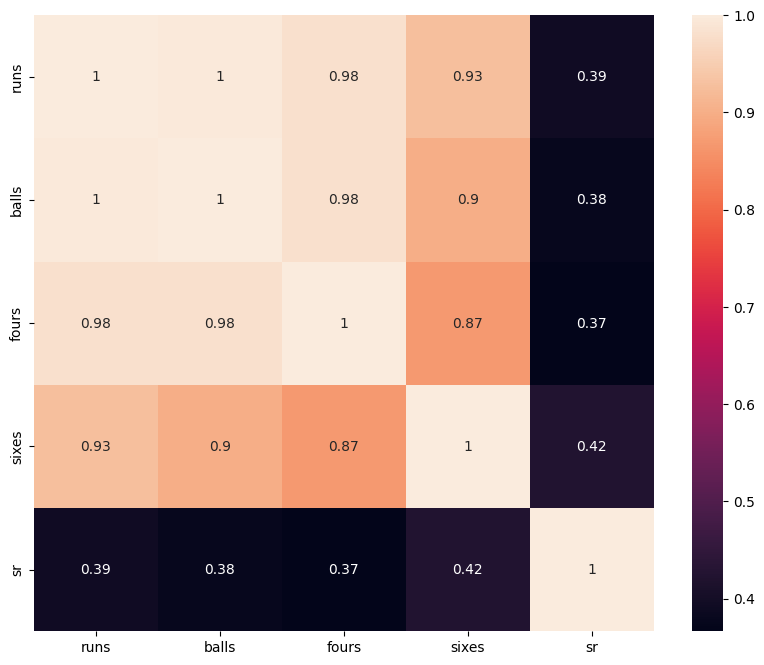

In [255]:
plt.figure(figsize=(10,8))
corr=df1.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

## Z SCORE

In [256]:
cc = df1.iloc[:,1:7] 
cc1 = cc.apply(zscore)
cc1.head()

,runs,balls,fours,sixes,sr
0,1.066848,1.111748,1.149951,0.744311,0.574756
1,2.679362,2.749563,2.774290,2.082874,0.607171
2,1.278226,1.452037,1.258240,1.390514,0.414351
3,0.718577,0.613764,0.543531,1.344357,0.875952
4,2.230435,2.542069,2.384448,1.067413,0.381906


In [257]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [258]:
silhouette_score(cc1,labels)

0.6692610388041141

## STANDARD SCALER

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

       runs     balls     fours     sixes        sr
0  1.066848  1.111748  1.149951  0.744311  0.574756
1  2.679362  2.749563  2.774290  2.082874  0.607171
2  1.278226  1.452037  1.258240  1.390514  0.414351
3  0.718577  0.613764  0.543531  1.344357  0.875952
4  2.230435  2.542069  2.384448  1.067413  0.381906


In [260]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [261]:
silhouette_score(cc_scaled_df,labels)

0.6692610388041141

## MIN MAX SCALER

In [262]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())


       runs     balls     fours     sixes        sr
0  0.329278  0.348327  0.316206  0.263636  0.396378
1  0.643642  0.673066  0.612648  0.527273  0.400978
2  0.370487  0.415798  0.335968  0.390909  0.373615
3  0.261381  0.249589  0.205534  0.381818  0.439121
4  0.556122  0.631925  0.541502  0.327273  0.369010


In [263]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [264]:
silhouette_score(cc_min_max_scaled_df,labels)

0.7057598043873229

## K-MEANS Implementation

In [265]:
cc1 = df1.iloc[:,1:7] 
cc1.head()

,runs,balls,fours,sixes,sr
0,839.0,635.0,80.0,29.0,132.125984
1,1640.0,1227.0,155.0,58.0,133.659332
2,944.0,758.0,85.0,43.0,124.538259
3,666.0,455.0,52.0,42.0,146.373626
4,1417.0,1152.0,137.0,36.0,123.003472


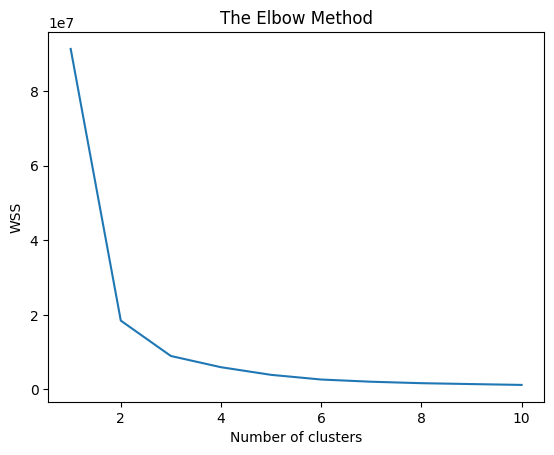

In [266]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc1)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [267]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [268]:
silhouette_score(cc1,labels)

0.7455191694679062

In [269]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

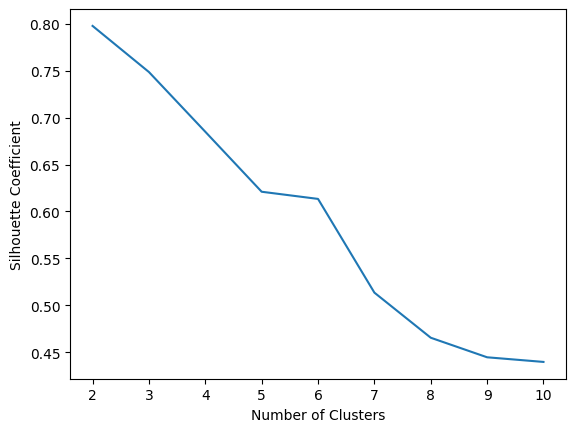

In [270]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [271]:
df1['cluster']=labels
df1.head()

,Name,runs,balls,fours,sixes,sr,cluster
0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984,2
1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332,1
2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259,2
3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626,2
4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472,1


In [272]:
df1.head(10)

,Name,runs,balls,fours,sixes,sr,cluster
0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984,2
1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332,1
2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259,2
3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626,2
4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472,1
5,Venkatesh Iyer,370.0,288.0,37.0,14.0,128.472222,0
6,Nitish Rana,1383.0,1035.0,130.0,64.0,133.623188,1
7,Sunil Narine,683.0,406.0,70.0,45.0,168.226601,2
8,Eoin Morgan,551.0,441.0,40.0,30.0,124.943311,2
9,Dinesh Karthik,1143.0,814.0,113.0,41.0,140.417690,2


In [273]:
aggdata=df1.iloc[:,0:7].groupby('cluster').mean()
aggdata['Freq']=df1.cluster.value_counts().sort_index()
aggdata

,runs,balls,fours,sixes,sr,Freq
cluster,,,,,,
0,69.076923,58.912088,5.362637,2.807692,95.150325,182
1,1572.565217,1155.043478,143.391304,61.913043,136.486704,23
2,738.911765,542.205882,63.411765,33.588235,135.988833,34


In [274]:
df1['cluster'] = df1['cluster'].replace({1: 'Grade A', 2: 'Grade B', 0: 'Grade C'})

In [275]:
Grade_A = df1[df1['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,runs,balls,fours,sixes,sr,cluster
1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332,Grade A
4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472,Grade A
6,Nitish Rana,1383.0,1035.0,130.0,64.0,133.623188,Grade A
15,Prithvi Shaw,1305.0,892.0,155.0,45.0,146.300448,Grade A
16,Shikhar Dhawan,2223.0,1645.0,253.0,53.0,135.136778,Grade A
18,Shreyas Iyer,1568.0,1288.0,117.0,56.0,121.739130,Grade A
19,Rishabh Pant,1934.0,1321.0,178.0,83.0,146.404239,Grade A
23,Virat Kohli,1865.0,1432.0,164.0,51.0,130.237430,Grade A
26,AB de Villiers,1689.0,1059.0,126.0,95.0,159.490085,Grade A
33,Ambati Rayudu,1500.0,1157.0,119.0,70.0,129.645635,Grade A


In [276]:
Grade_B = df1[df1['cluster'] == 'Grade B']
Grade_B.head()

,Name,runs,balls,fours,sixes,sr,cluster
0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984,Grade B
2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259,Grade B
3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626,Grade B
7,Sunil Narine,683.0,406.0,70.0,45.0,168.226601,Grade B
8,Eoin Morgan,551.0,441.0,40.0,30.0,124.943311,Grade B


In [277]:
Grade_C = df1[df1['cluster'] == 'Grade C']
Grade_C.head(10)

,Name,runs,balls,fours,sixes,sr,cluster
5,Venkatesh Iyer,370.0,288.0,37.0,14.0,128.472222,Grade C
10,Shakib Al Hasan,295.0,255.0,29.0,6.0,115.686275,Grade C
12,Lockie Ferguson,61.0,40.0,5.0,2.0,152.500000,Grade C
13,Shivam Mavi,48.0,49.0,4.0,2.0,97.959184,Grade C
14,Varun Chakravarthy,12.0,19.0,0.0,0.0,63.157895,Grade C
21,Axar Patel,347.0,288.0,21.0,16.0,120.486111,Grade C
24,Srikar Bharat,191.0,156.0,10.0,8.0,122.435897,Grade C
27,Shahbaz Ahmed,60.0,54.0,4.0,2.0,111.111111,Grade C
28,Dan Christian,14.0,24.0,1.0,0.0,58.333333,Grade C
29,Harshal Patel,140.0,105.0,9.0,8.0,133.333333,Grade C


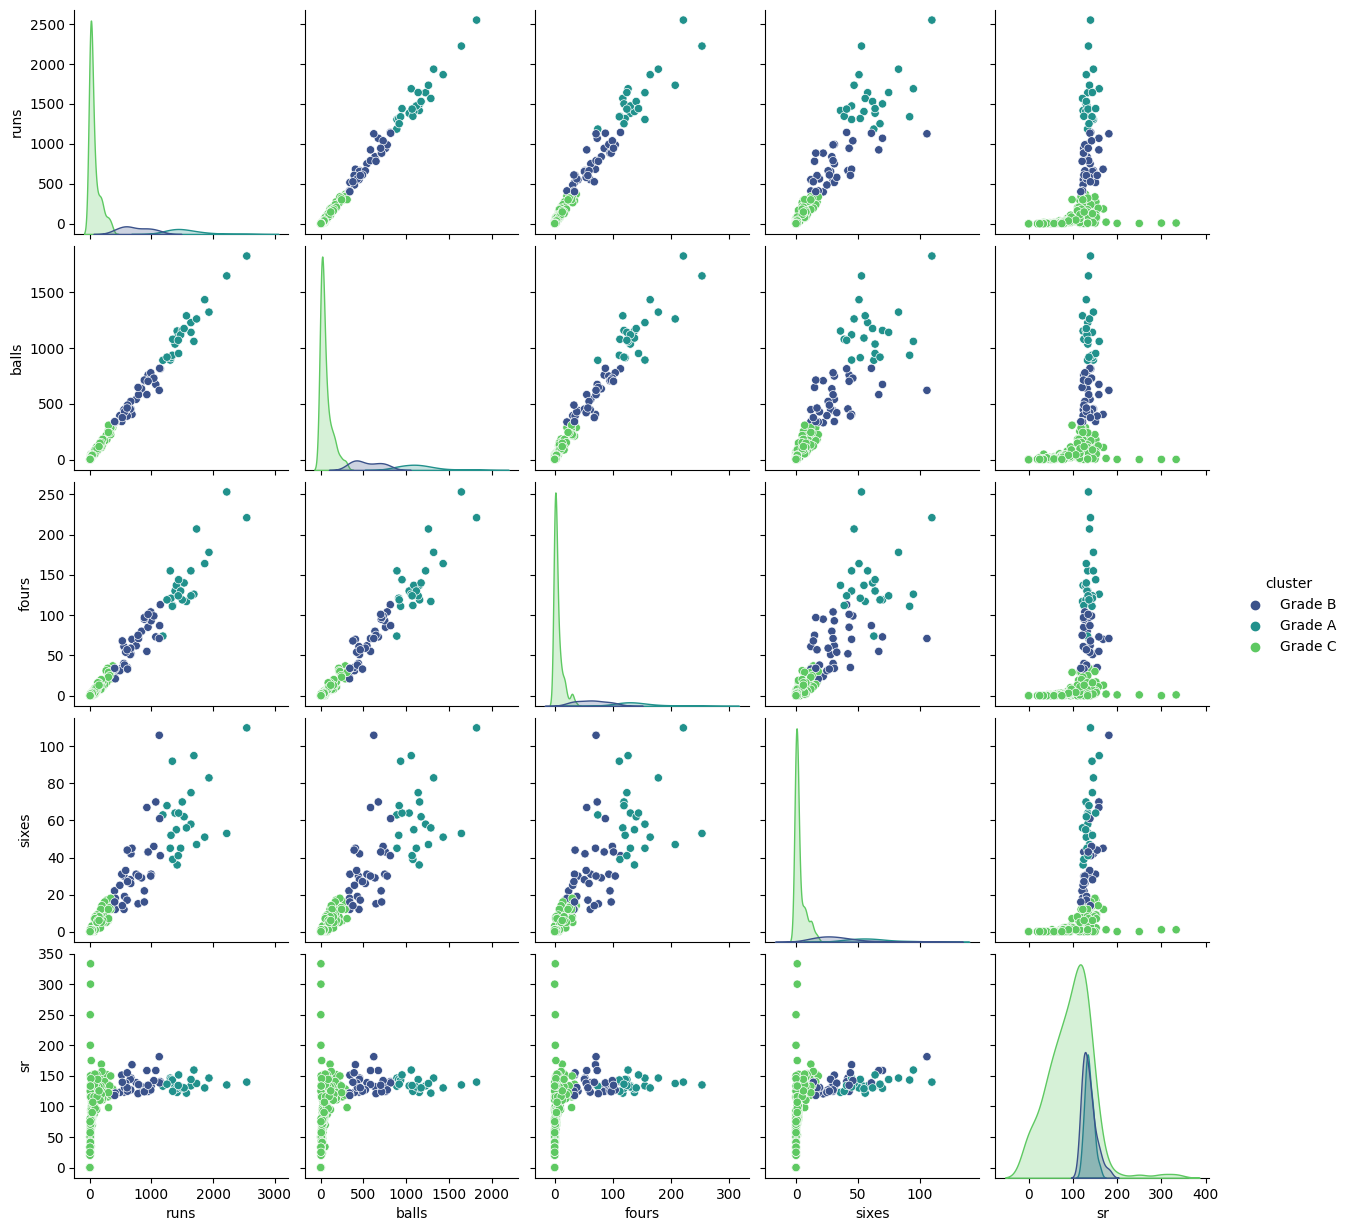

In [278]:
sns.pairplot(df1, hue='cluster', palette='viridis')
plt.show()

##  HIERARCHICAL CLUSTERING

In [279]:
cc1 = df_h1.iloc[:,1:7] 
cc1.head()

,runs,balls,fours,sixes,sr
0,839.0,635.0,80.0,29.0,132.125984
1,1640.0,1227.0,155.0,58.0,133.659332
2,944.0,758.0,85.0,43.0,124.538259
3,666.0,455.0,52.0,42.0,146.373626
4,1417.0,1152.0,137.0,36.0,123.003472


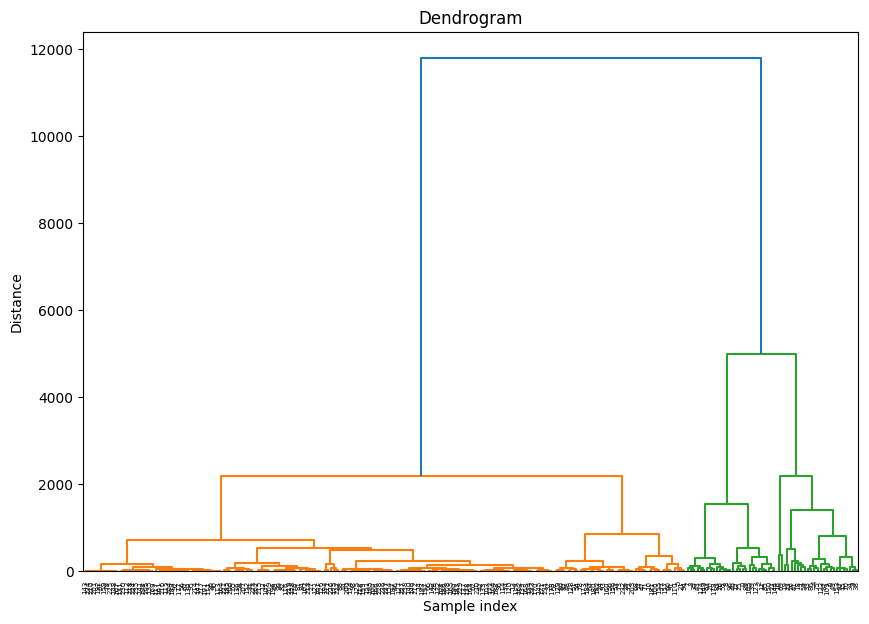

In [280]:
linkage_matrix = linkage(cc1, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [281]:
num_clusters = 3

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc1)

silhouette_avg = silhouette_score(cc1, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.74


In [282]:
df_h1['Cluster'] = clusters
print(df_h1.head())


              Name    runs   balls  fours  sixes          sr  Cluster
0  Ruturaj Gaikwad   839.0   635.0   80.0   29.0  132.125984        2
1   Faf du Plessis  1640.0  1227.0  155.0   58.0  133.659332        0
2    Robin Uthappa   944.0   758.0   85.0   43.0  124.538259        2
3        Moeen Ali   666.0   455.0   52.0   42.0  146.373626        2
4     Shubman Gill  1417.0  1152.0  137.0   36.0  123.003472        0


In [283]:
df_h1.head(10)

,Name,runs,balls,fours,sixes,sr,Cluster
0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984,2
1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332,0
2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259,2
3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626,2
4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472,0
5,Venkatesh Iyer,370.0,288.0,37.0,14.0,128.472222,1
6,Nitish Rana,1383.0,1035.0,130.0,64.0,133.623188,0
7,Sunil Narine,683.0,406.0,70.0,45.0,168.226601,2
8,Eoin Morgan,551.0,441.0,40.0,30.0,124.943311,2
9,Dinesh Karthik,1143.0,814.0,113.0,41.0,140.417690,0


In [284]:
aggdata=df_h1.iloc[:,0:7].groupby('Cluster').mean()
aggdata['Freq']=df_h1.Cluster.value_counts().sort_index()
aggdata

,runs,balls,fours,sixes,sr,Freq
Cluster,,,,,,
0,1537.800000,1127.920000,139.920000,61.040000,136.724818,25
1,76.322581,64.908602,5.849462,3.112903,95.689316,186
2,757.964286,551.857143,65.857143,34.714286,137.994299,28


In [285]:
df_h1['Cluster'] = df_h1['Cluster'].replace({0: 'Grade A', 2: 'Grade B', 1: 'Grade C'})

In [286]:
Grade_A = df_h1[df_h1['Cluster'] == 'Grade A']
Grade_A.head(10)

,Name,runs,balls,fours,sixes,sr,Cluster
1,Faf du Plessis,1640.0,1227.0,155.0,58.0,133.659332,Grade A
4,Shubman Gill,1417.0,1152.0,137.0,36.0,123.003472,Grade A
6,Nitish Rana,1383.0,1035.0,130.0,64.0,133.623188,Grade A
9,Dinesh Karthik,1143.0,814.0,113.0,41.0,140.417690,Grade A
15,Prithvi Shaw,1305.0,892.0,155.0,45.0,146.300448,Grade A
16,Shikhar Dhawan,2223.0,1645.0,253.0,53.0,135.136778,Grade A
18,Shreyas Iyer,1568.0,1288.0,117.0,56.0,121.739130,Grade A
19,Rishabh Pant,1934.0,1321.0,178.0,83.0,146.404239,Grade A
23,Virat Kohli,1865.0,1432.0,164.0,51.0,130.237430,Grade A
26,AB de Villiers,1689.0,1059.0,126.0,95.0,159.490085,Grade A


In [287]:
Grade_B = df_h1[df_h1['Cluster'] == 'Grade B']
Grade_B.head()

,Name,runs,balls,fours,sixes,sr,Cluster
0,Ruturaj Gaikwad,839.0,635.0,80.0,29.0,132.125984,Grade B
2,Robin Uthappa,944.0,758.0,85.0,43.0,124.538259,Grade B
3,Moeen Ali,666.0,455.0,52.0,42.0,146.373626,Grade B
7,Sunil Narine,683.0,406.0,70.0,45.0,168.226601,Grade B
8,Eoin Morgan,551.0,441.0,40.0,30.0,124.943311,Grade B


In [288]:
Grade_C = df_h1[df_h1['Cluster'] == 'Grade C']
Grade_C.head(10)

,Name,runs,balls,fours,sixes,sr,Cluster
5,Venkatesh Iyer,370.0,288.0,37.0,14.0,128.472222,Grade C
10,Shakib Al Hasan,295.0,255.0,29.0,6.0,115.686275,Grade C
12,Lockie Ferguson,61.0,40.0,5.0,2.0,152.500000,Grade C
13,Shivam Mavi,48.0,49.0,4.0,2.0,97.959184,Grade C
14,Varun Chakravarthy,12.0,19.0,0.0,0.0,63.157895,Grade C
21,Axar Patel,347.0,288.0,21.0,16.0,120.486111,Grade C
24,Srikar Bharat,191.0,156.0,10.0,8.0,122.435897,Grade C
27,Shahbaz Ahmed,60.0,54.0,4.0,2.0,111.111111,Grade C
28,Dan Christian,14.0,24.0,1.0,0.0,58.333333,Grade C
29,Harshal Patel,140.0,105.0,9.0,8.0,133.333333,Grade C


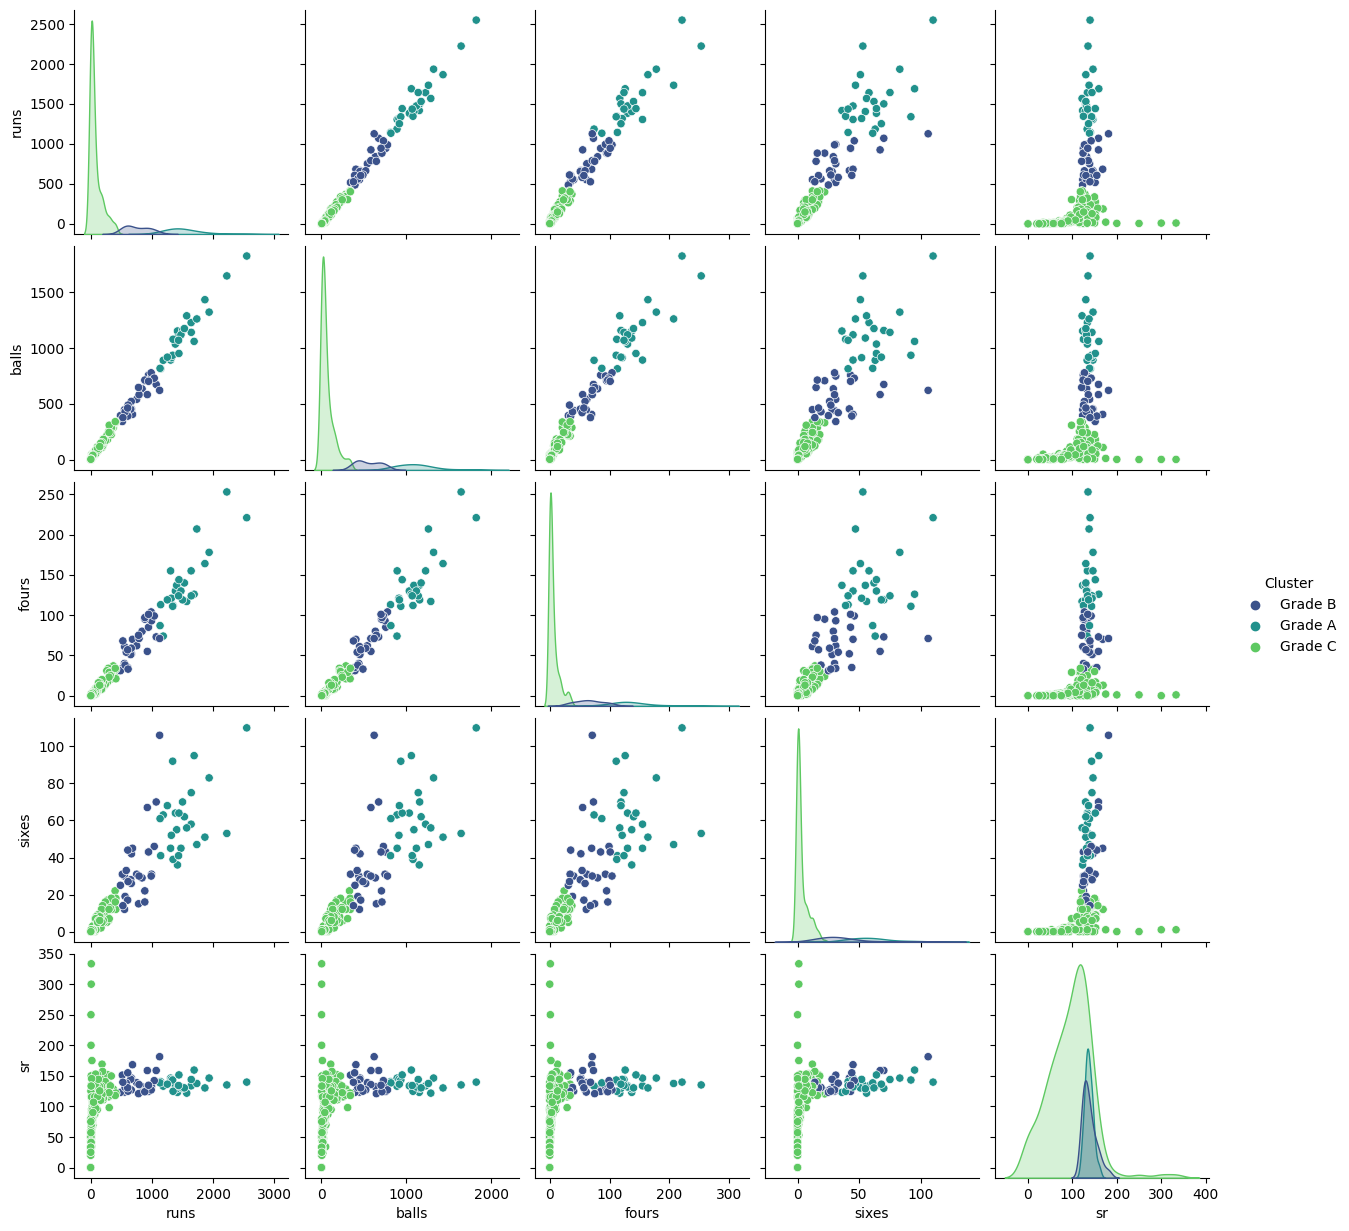

In [289]:
sns.pairplot(df_h1, hue='Cluster', palette='viridis')
plt.show()


## DB SCAN CLUSTERING

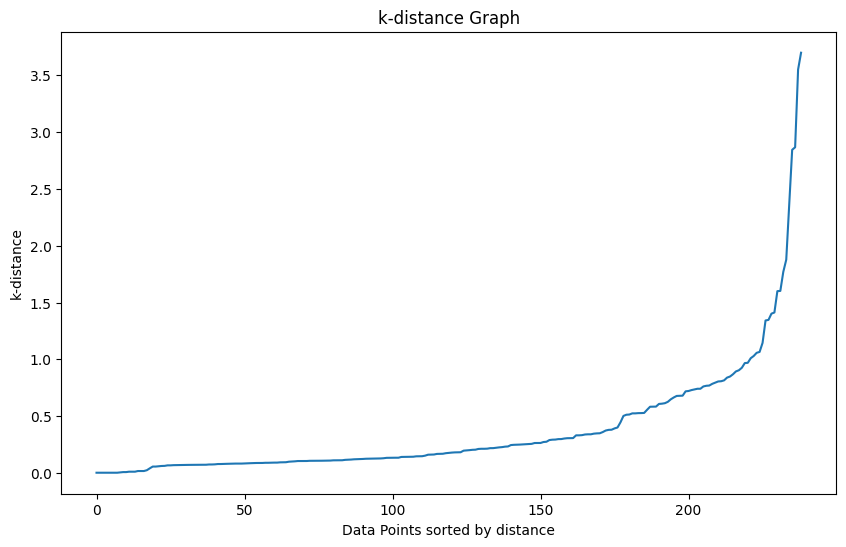

In [290]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db1.iloc[:, 1:6])

min_samples = 6


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 38
Silhouette Score: 0.53


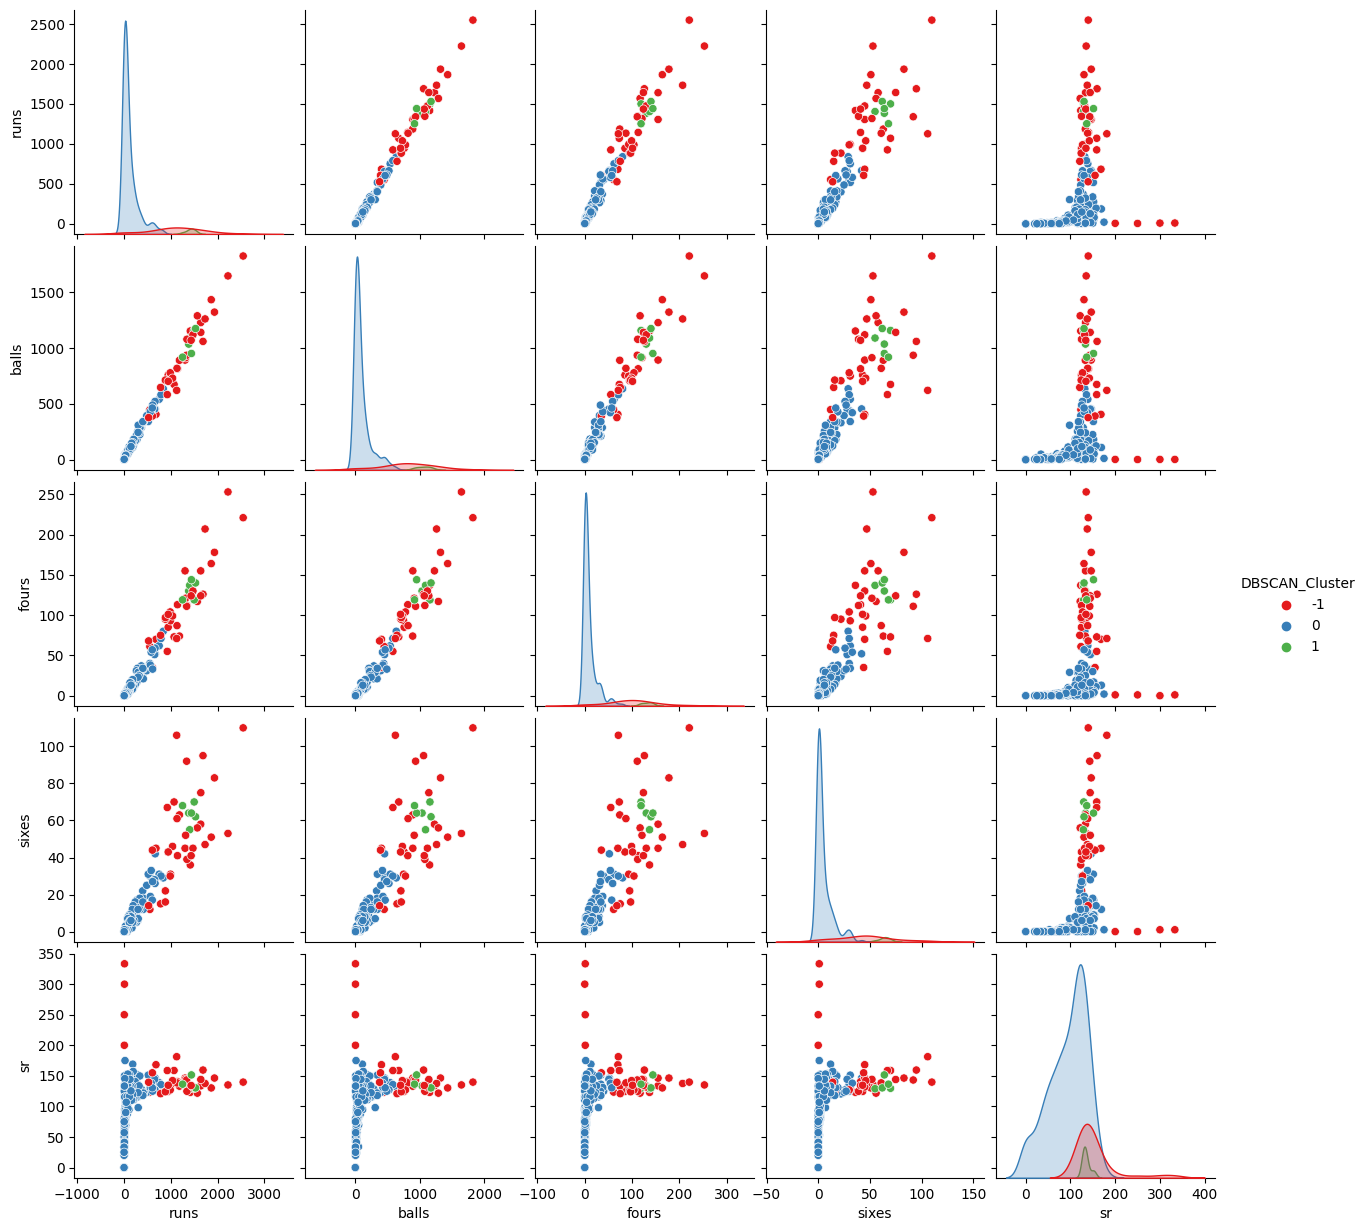

In [291]:
epsilon = 0.6

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

df_db1['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")
    
sns.pairplot(df_db1, hue='DBSCAN_Cluster', palette='Set1')
plt.show()

## BOWLING DATA

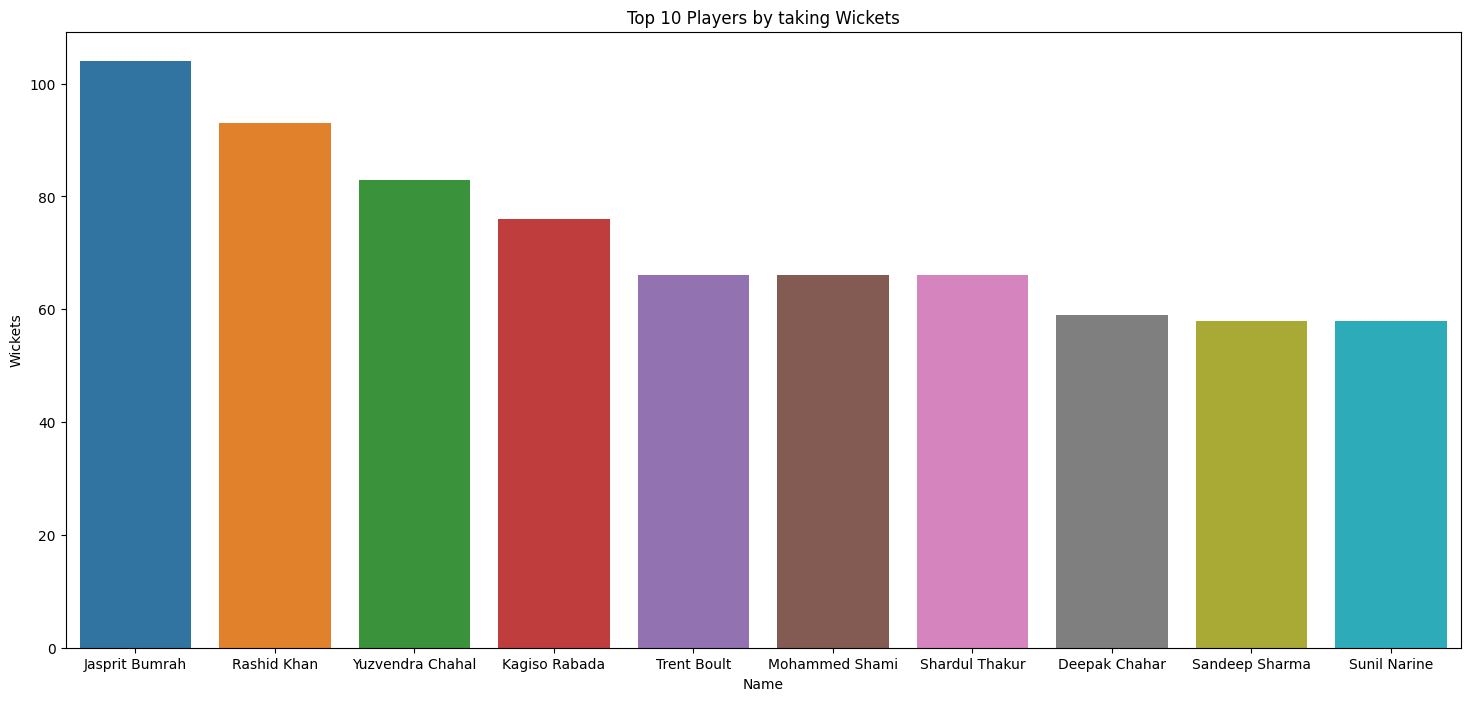

In [292]:
plt.figure(figsize=(18,8))
b1=df2.groupby('Name')['Wickets'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Wickets']
sns.barplot(data= b1 , x= 'Name' , y ='Wickets');
plt.title("Top 10 Players by taking Wickets");

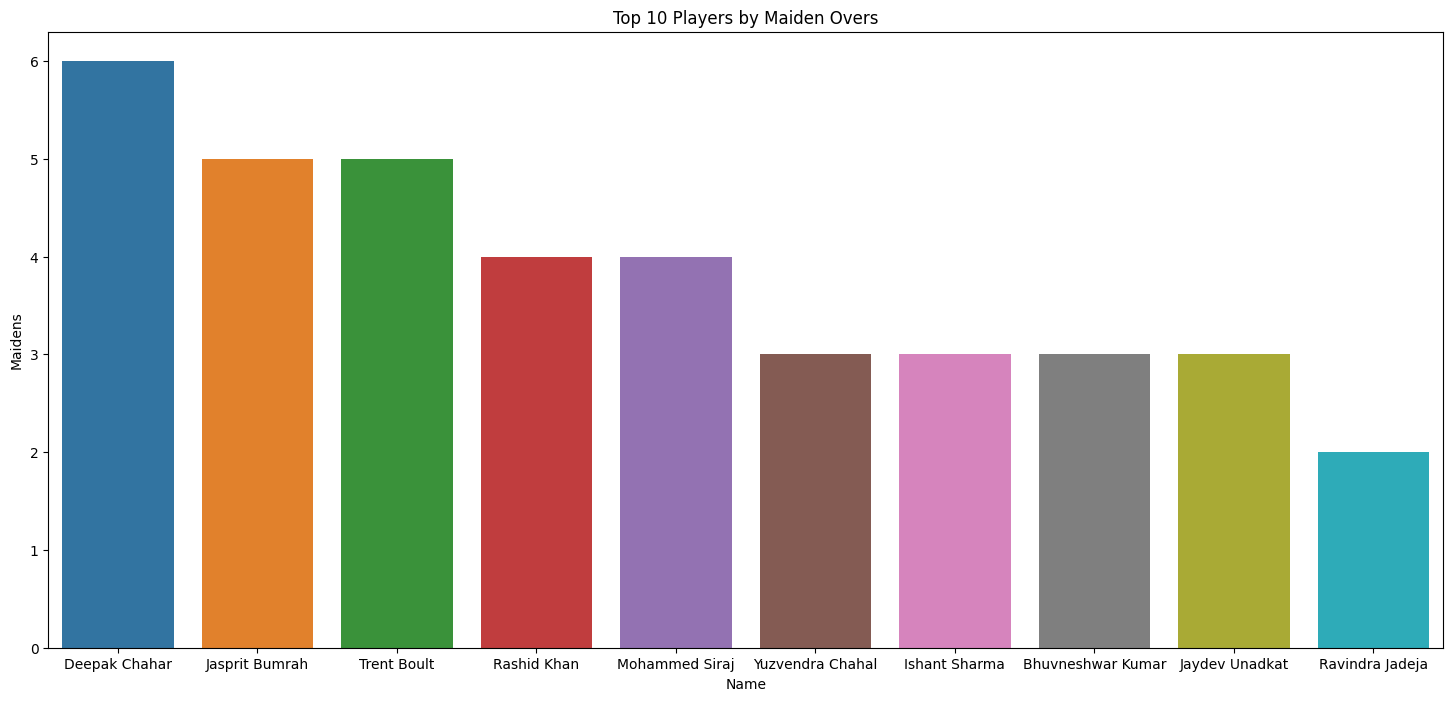

In [293]:
plt.figure(figsize=(18,8))
b1=df2.groupby('Name')['Maidens'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Maidens']
sns.barplot(data= b1 , x= 'Name' , y ='Maidens');
plt.title("Top 10 Players by Maiden Overs");

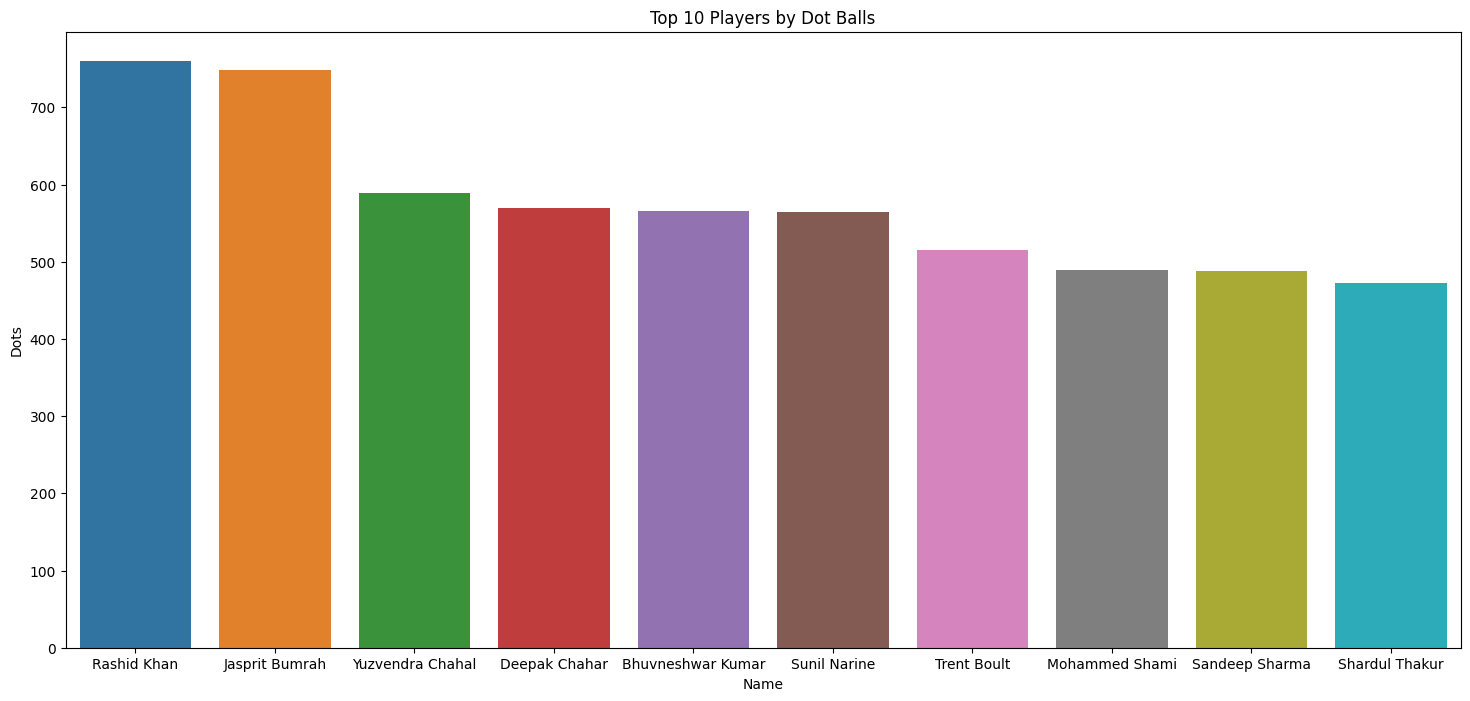

In [294]:
plt.figure(figsize=(18,8))
b1=df2.groupby('Name')['Dots'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Dots']
sns.barplot(data= b1 , x= 'Name' , y ='Dots');
plt.title("Top 10 Players by Dot Balls");

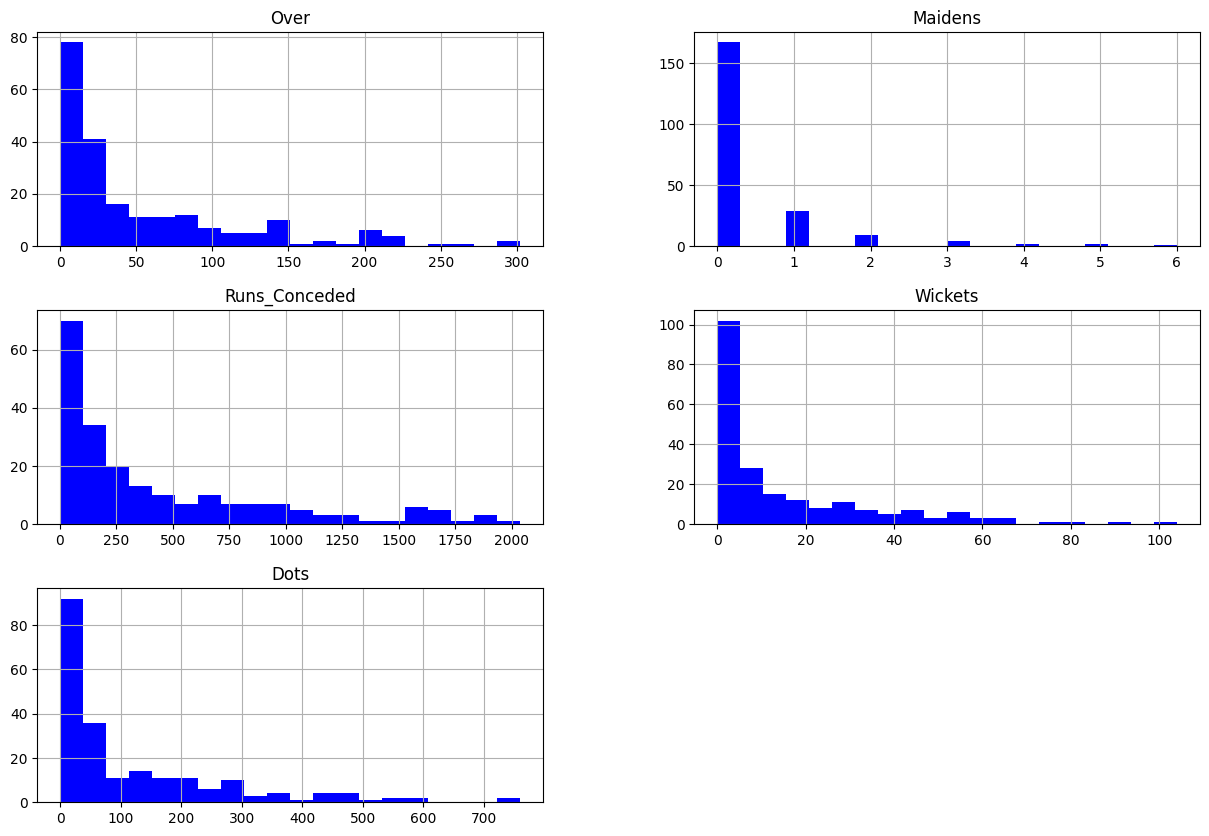

In [295]:
df2.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

In [296]:
df2.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots
0,Shakib Al Hasan,96.5,0,769,20,177
1,Shivam Mavi,86.1,2,715,25,218
2,Lockie Ferguson,79.5,1,648,24,197
3,Varun Chakravarthy,123.0,0,839,36,268
4,Sunil Narine,258.2,1,1889,58,564


[Text(0.5, 1.0, 'Distribution of Maiden overs')]

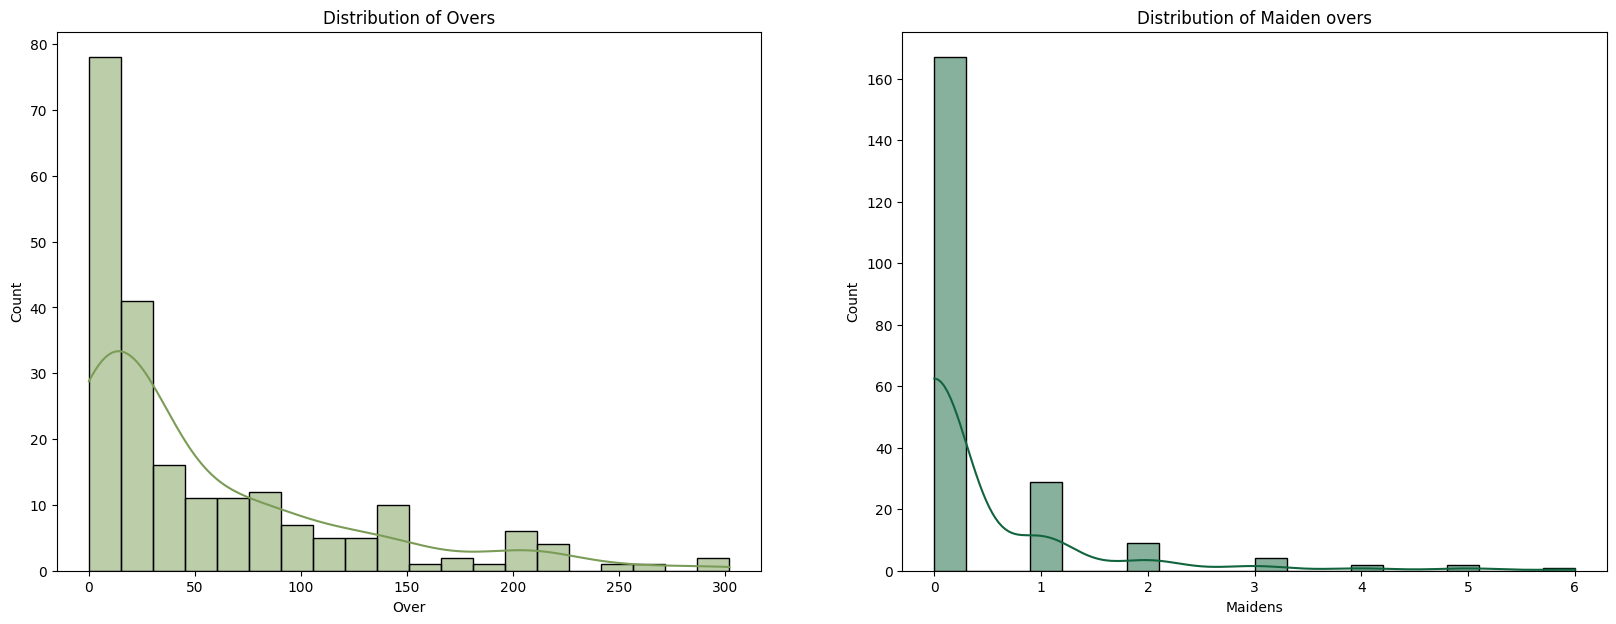

In [297]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df2["Over"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of Overs")

sns.histplot(ax = axes[1], x = df2["Maidens"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Maiden overs")


[Text(0.5, 1.0, 'Distribution of Wickets')]

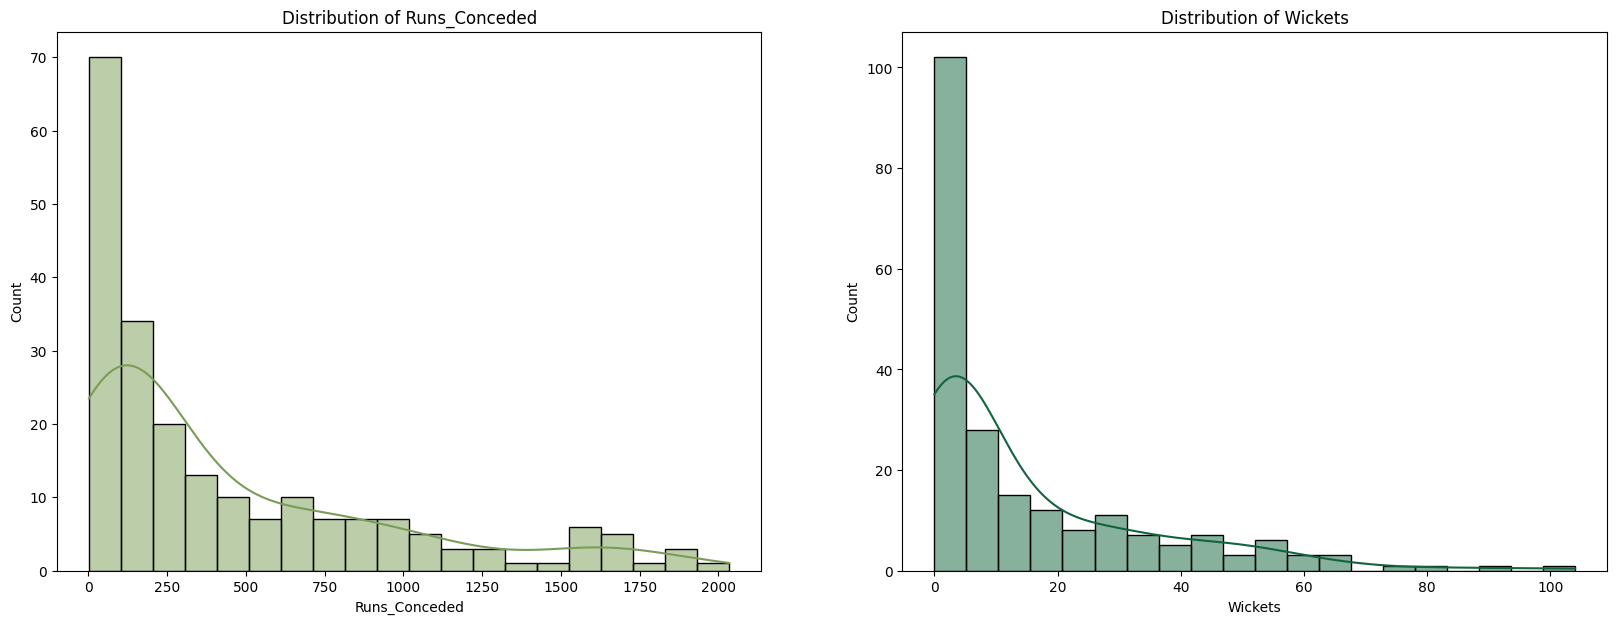

In [298]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df2["Runs_Conceded"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of Runs_Conceded")

sns.histplot(ax = axes[1], x = df2["Wickets"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Wickets")


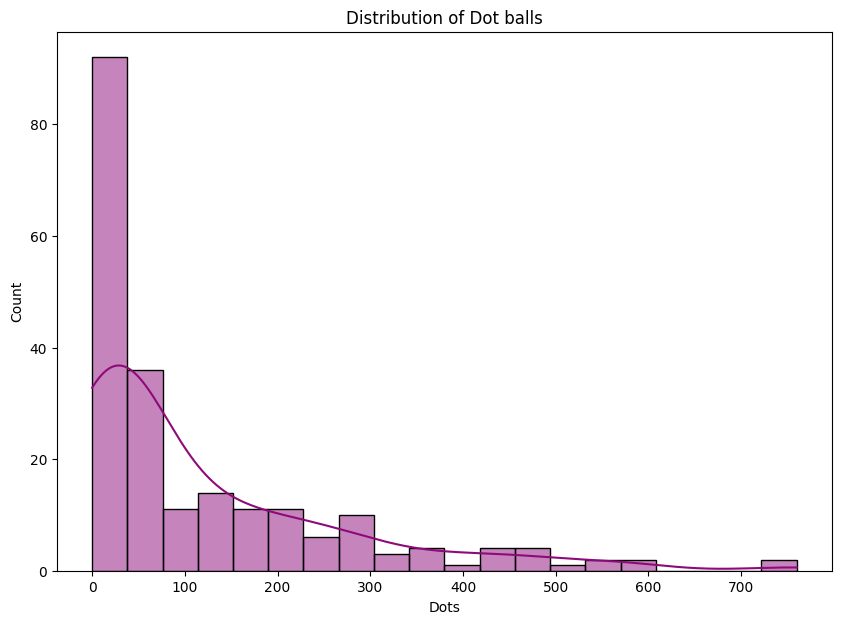

In [299]:
plt.figure(figsize=(10, 7))  

sns.histplot(df2["Dots"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Dot balls")
plt.show()


In [300]:
df_h2 = df2.copy()
df_db2 = df2.copy()

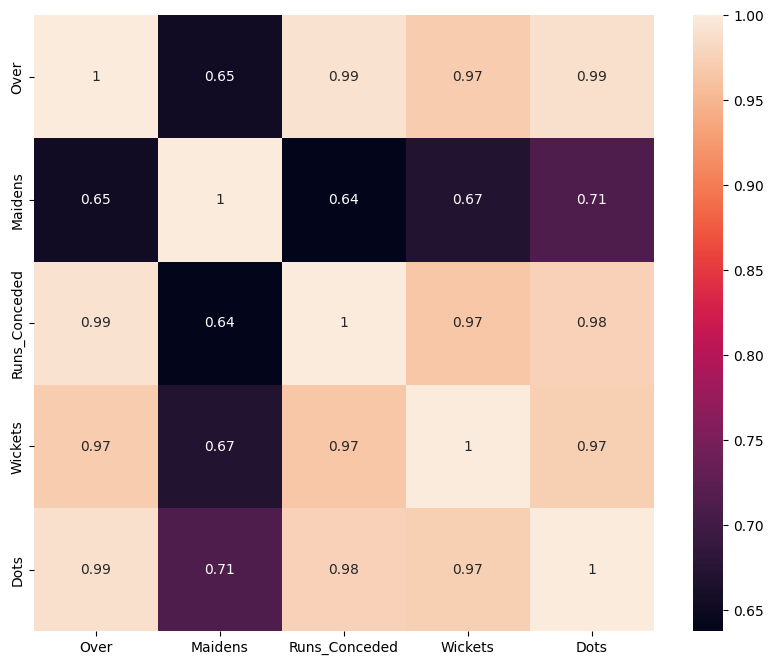

In [301]:
plt.figure(figsize=(10,8))
corr=df2.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

## Z SCORE

In [302]:
cc = df2.iloc[:,1:7] 
cc1 = cc.apply(zscore)
cc1.head()

,Over,Maidens,Runs_Conceded,Wickets,Dots
0,0.670275,-0.415119,0.656685,0.245711,0.393768
1,0.508255,1.725496,0.548349,0.499977,0.666367
2,0.405435,0.655188,0.413931,0.449124,0.526743
3,1.083113,-0.415119,0.797121,1.059361,0.998804
4,3.189369,0.655188,2.903666,2.178130,2.966835


In [303]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [304]:
silhouette_score(cc1,labels)

0.6703118954801027

## Standard Scaler

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

       Over   Maidens  Runs_Conceded   Wickets      Dots
0  0.670275 -0.415119       0.656685  0.245711  0.393768
1  0.508255  1.725496       0.548349  0.499977  0.666367
2  0.405435  0.655188       0.413931  0.449124  0.526743
3  1.083113 -0.415119       0.797121  1.059361  0.998804
4  3.189369  0.655188       2.903666  2.178130  2.966835


In [306]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [307]:
silhouette_score(cc_scaled_df,labels)

0.6703118954801027

## MIN MAX SCALER

In [308]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())


       Over   Maidens  Runs_Conceded   Wickets      Dots
0  0.319311  0.000000       0.377275  0.192308  0.232895
1  0.284863  0.333333       0.350713  0.240385  0.286842
2  0.263001  0.166667       0.317757  0.230769  0.259211
3  0.407088  0.000000       0.411707  0.346154  0.352632
4  0.854919  0.166667       0.928185  0.557692  0.742105


In [309]:
kmeans = KMeans(n_clusters=2,init="k-means++",random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [310]:
silhouette_score(cc_min_max_scaled_df,labels)

0.679077059940008

## K-MEANS Implementation

In [311]:
cc2 = df2.iloc[:,1:6]
cc2.head()

,Over,Maidens,Runs_Conceded,Wickets,Dots
0,96.5,0,769,20,177
1,86.1,2,715,25,218
2,79.5,1,648,24,197
3,123.0,0,839,36,268
4,258.2,1,1889,58,564


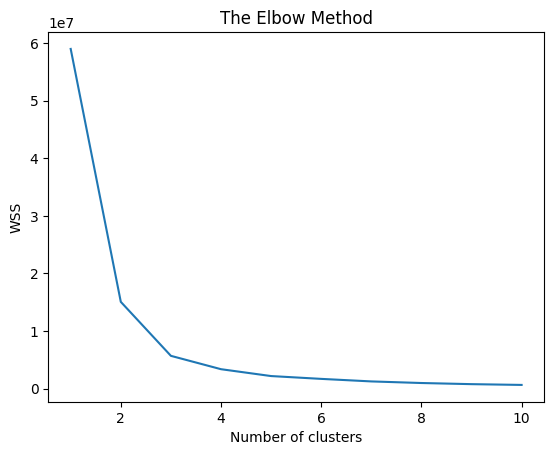

In [312]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init="k-means++",random_state=0)
    kmeans.fit(cc2)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [313]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(cc2)
labels = kmeans.labels_
centroids_bowling = kmeans.cluster_centers_

In [314]:
silhouette_score(cc2,labels)

0.7011486159501947

In [315]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc2)
    score = silhouette_score(cc2,kmeans.labels_)
    silhouette_coefficients.append(score)

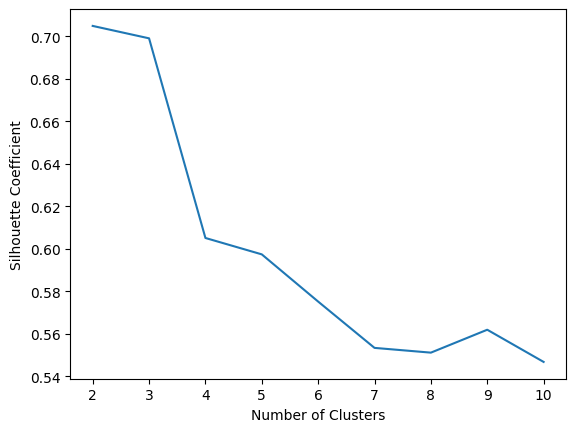

In [316]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [317]:
df2['cluster']=labels
df2.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
0,Shakib Al Hasan,96.5,0,769,20,177,1
1,Shivam Mavi,86.1,2,715,25,218,1
2,Lockie Ferguson,79.5,1,648,24,197,1
3,Varun Chakravarthy,123.0,0,839,36,268,1
4,Sunil Narine,258.2,1,1889,58,564,2


In [318]:
df2.cluster.value_counts().sort_index()

0    142
1     51
2     21
Name: cluster, dtype: int64

In [319]:
df2.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
0,Shakib Al Hasan,96.5,0,769,20,177,1
1,Shivam Mavi,86.1,2,715,25,218,1
2,Lockie Ferguson,79.5,1,648,24,197,1
3,Varun Chakravarthy,123.0,0,839,36,268,1
4,Sunil Narine,258.2,1,1889,58,564,2
5,Venkatesh Iyer,8.3,0,69,3,14,0
6,Deepak Chahar,215.4,6,1681,59,570,2
7,Josh Hazlewood,45.0,0,357,12,118,0
8,Shardul Thakur,206.2,2,1829,66,472,2
9,Dwayne Bravo,148.4,1,1306,45,272,2


In [320]:
aggdata=df2.iloc[:,0:7].groupby('cluster').mean()
aggdata['Freq']=df2.cluster.value_counts().sort_index()
aggdata

,Over,Maidens,Runs_Conceded,Wickets,Dots,Freq
cluster,,,,,,
0,15.860563,0.091549,141.838028,3.964789,32.077465,142
1,95.092157,0.490196,790.333333,27.568627,208.470588,51
2,206.752381,2.142857,1622.428571,60.809524,477.000000,21


In [321]:
df2['cluster'] = df2['cluster'].replace({2: 'Grade A', 1: 'Grade B', 0: 'Grade C'})

In [322]:
Grade_A = df2[df2['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
4,Sunil Narine,258.2,1,1889,58,564,Grade A
6,Deepak Chahar,215.4,6,1681,59,570,Grade A
8,Shardul Thakur,206.2,2,1829,66,472,Grade A
9,Dwayne Bravo,148.4,1,1306,45,272,Grade A
10,Ravindra Jadeja,217.8,2,1659,50,430,Grade A
12,Ravichandran Ashwin,200.4,0,1532,45,373,Grade A
14,Axar Patel,222.0,0,1577,52,436,Grade A
15,Kagiso Rabada,188.8,2,1560,76,456,Grade A
16,Mohammed Siraj,170.8,4,1437,50,433,Grade A
19,Yuzvendra Chahal,252.6,3,1861,83,589,Grade A


In [323]:
Grade_B = df2[df2['cluster'] == 'Grade B']
Grade_B.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
0,Shakib Al Hasan,96.5,0,769,20,177,Grade B
1,Shivam Mavi,86.1,2,715,25,218,Grade B
2,Lockie Ferguson,79.5,1,648,24,197,Grade B
3,Varun Chakravarthy,123.0,0,839,36,268,Grade B
11,Anrich Nortje,90.8,1,699,34,244,Grade B
13,Avesh Khan,91.0,0,749,29,226,Grade B
18,Harshal Patel,100.5,0,880,47,204,Grade B
20,Glenn Maxwell,72.0,0,561,18,133,Grade B
22,Moeen Ali,68.3,0,469,16,148,Grade B
27,Jason Holder,59.5,0,480,30,133,Grade B


In [324]:
Grade_C = df2[df2['cluster'] == 'Grade C']
Grade_C.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,cluster
5,Venkatesh Iyer,8.3,0,69,3,14,Grade C
7,Josh Hazlewood,45.0,0,357,12,118,Grade C
17,George Garton,15.0,0,135,3,32,Grade C
21,Dan Christian,16.4,0,155,4,29,Grade C
23,Tom Curran,39.0,0,430,13,59,Grade C
24,Ripal Patel,3.0,0,22,0,5,Grade C
25,Mohammad Nabi,56.7,0,408,13,134,Grade C
28,Umran Malik,12.0,0,96,2,31,Grade C
30,Abhishek Sharma,22.0,0,176,7,37,Grade C
35,James Neesham,24.0,0,214,7,47,Grade C


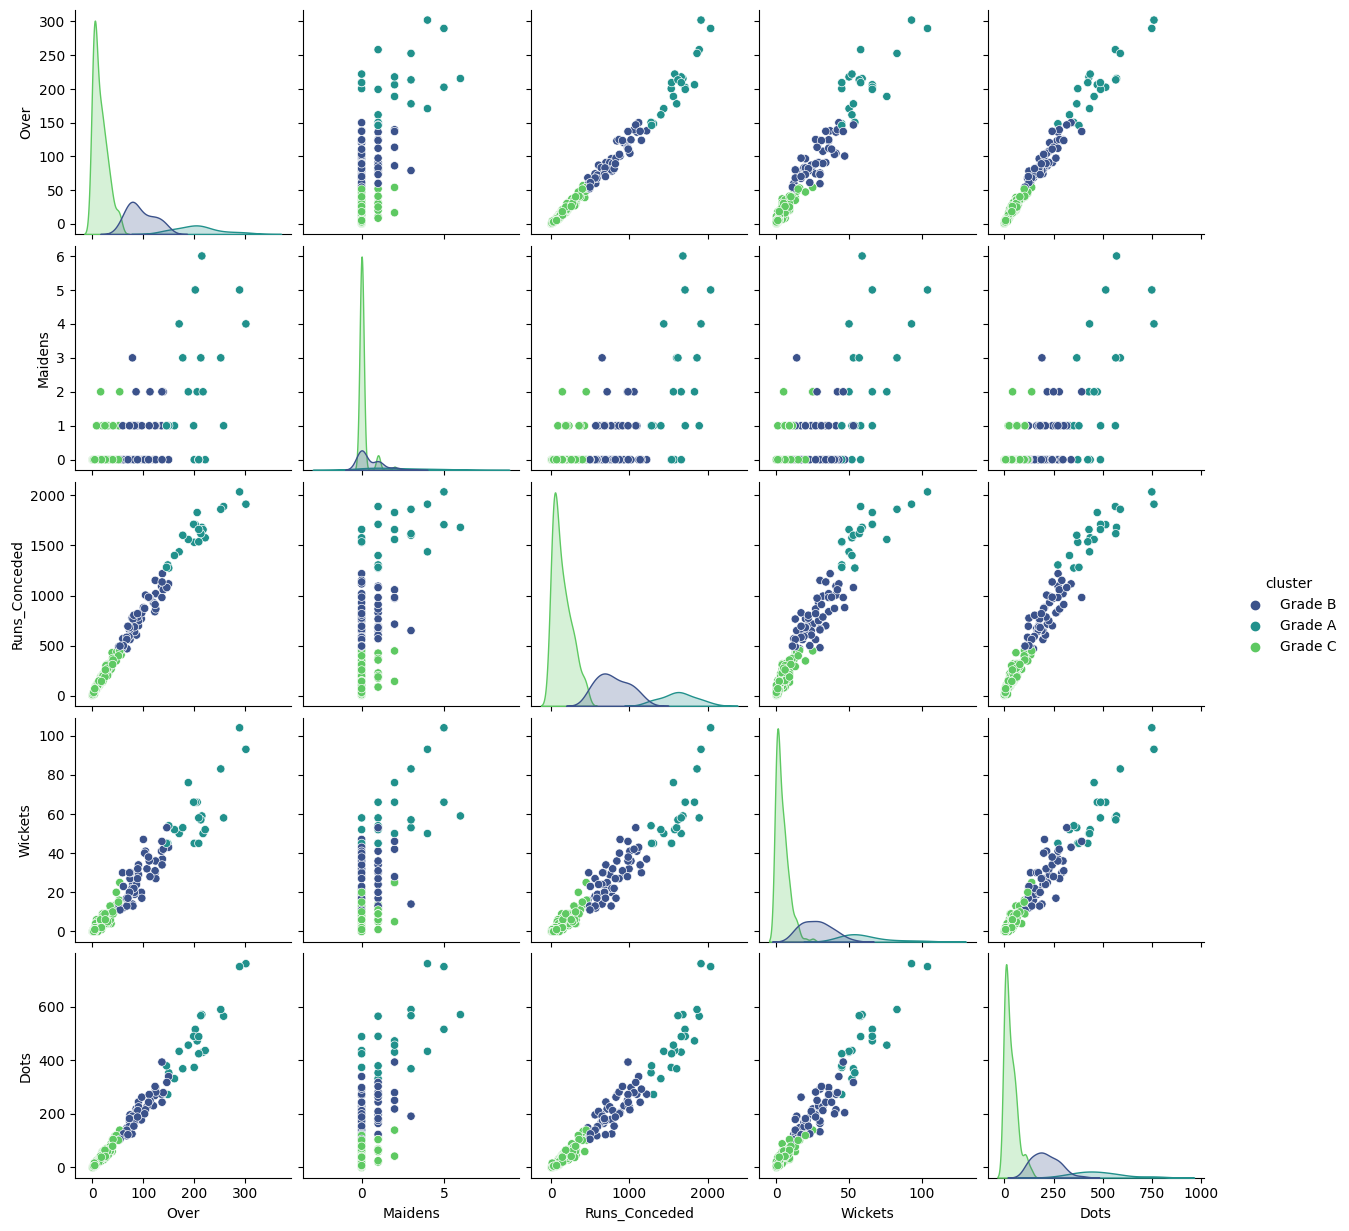

In [325]:
sns.pairplot(df2, hue='cluster', palette='viridis')
plt.show()

## HIERARCHICAL CLUSTERING

In [326]:
cc2 = df_h2.iloc[:,1:6] 
cc2.head()

,Over,Maidens,Runs_Conceded,Wickets,Dots
0,96.5,0,769,20,177
1,86.1,2,715,25,218
2,79.5,1,648,24,197
3,123.0,0,839,36,268
4,258.2,1,1889,58,564


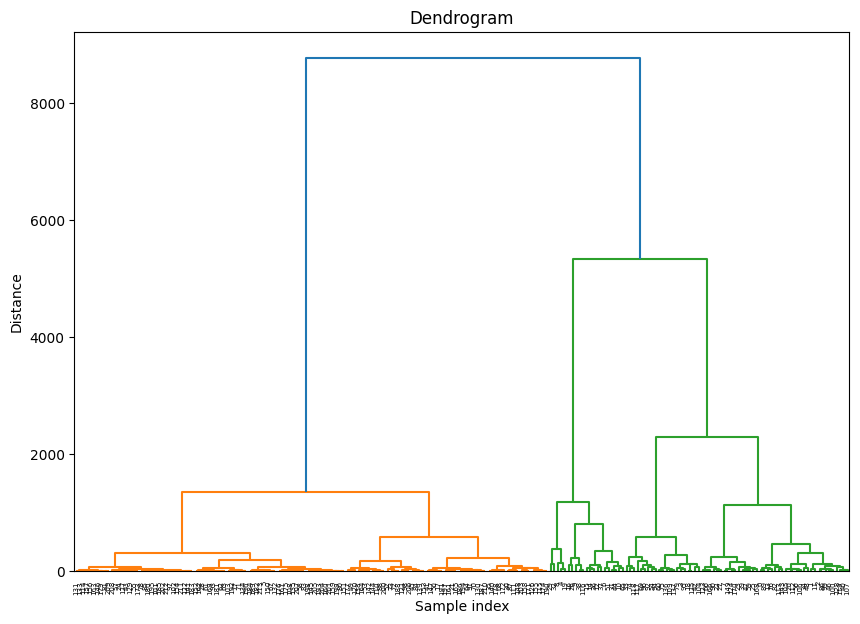

In [327]:
linkage_matrix = linkage(cc2, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [328]:
num_clusters = 3

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc2)

silhouette_avg = silhouette_score(cc2, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.68


In [329]:
df_h2['Cluster'] = clusters
print(df_h2.head())


                 Name   Over  Maidens  Runs_Conceded  Wickets  Dots  Cluster
0     Shakib Al Hasan   96.5        0            769       20   177        0
1         Shivam Mavi   86.1        2            715       25   218        0
2     Lockie Ferguson   79.5        1            648       24   197        0
3  Varun Chakravarthy  123.0        0            839       36   268        0
4        Sunil Narine  258.2        1           1889       58   564        2


In [330]:
df_h2.head(10)

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,Cluster
0,Shakib Al Hasan,96.5,0,769,20,177,0
1,Shivam Mavi,86.1,2,715,25,218,0
2,Lockie Ferguson,79.5,1,648,24,197,0
3,Varun Chakravarthy,123.0,0,839,36,268,0
4,Sunil Narine,258.2,1,1889,58,564,2
5,Venkatesh Iyer,8.3,0,69,3,14,1
6,Deepak Chahar,215.4,6,1681,59,570,2
7,Josh Hazlewood,45.0,0,357,12,118,0
8,Shardul Thakur,206.2,2,1829,66,472,2
9,Dwayne Bravo,148.4,1,1306,45,272,2


In [331]:
aggdata=df_h2.iloc[:,0:7].groupby('Cluster').mean()
aggdata['Freq']=df_h2.Cluster.value_counts().sort_index()
aggdata

,Over,Maidens,Runs_Conceded,Wickets,Dots,Freq
Cluster,,,,,,
0,86.732258,0.483871,721.709677,25.290323,190.774194,62
1,13.164122,0.061069,119.862595,3.061069,25.641221,131
2,206.752381,2.142857,1622.428571,60.809524,477.000000,21


In [332]:
df_h2['Cluster'] = df_h2['Cluster'].replace({2: 'Grade A', 0: 'Grade B', 1: 'Grade C'})

In [333]:
Grade_A = df_h2[df_h2['Cluster'] == 'Grade A']
Grade_A.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,Cluster
4,Sunil Narine,258.2,1,1889,58,564,Grade A
6,Deepak Chahar,215.4,6,1681,59,570,Grade A
8,Shardul Thakur,206.2,2,1829,66,472,Grade A
9,Dwayne Bravo,148.4,1,1306,45,272,Grade A
10,Ravindra Jadeja,217.8,2,1659,50,430,Grade A


In [334]:
Grade_B = df_h2[df_h2['Cluster'] == 'Grade B']
Grade_B.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,Cluster
0,Shakib Al Hasan,96.5,0,769,20,177,Grade B
1,Shivam Mavi,86.1,2,715,25,218,Grade B
2,Lockie Ferguson,79.5,1,648,24,197,Grade B
3,Varun Chakravarthy,123.0,0,839,36,268,Grade B
7,Josh Hazlewood,45.0,0,357,12,118,Grade B


In [335]:
Grade_C = df_h2[df_h2['Cluster'] == 'Grade C']
Grade_C.head()

,Name,Over,Maidens,Runs_Conceded,Wickets,Dots,Cluster
5,Venkatesh Iyer,8.3,0,69,3,14,Grade C
17,George Garton,15.0,0,135,3,32,Grade C
21,Dan Christian,16.4,0,155,4,29,Grade C
24,Ripal Patel,3.0,0,22,0,5,Grade C
28,Umran Malik,12.0,0,96,2,31,Grade C


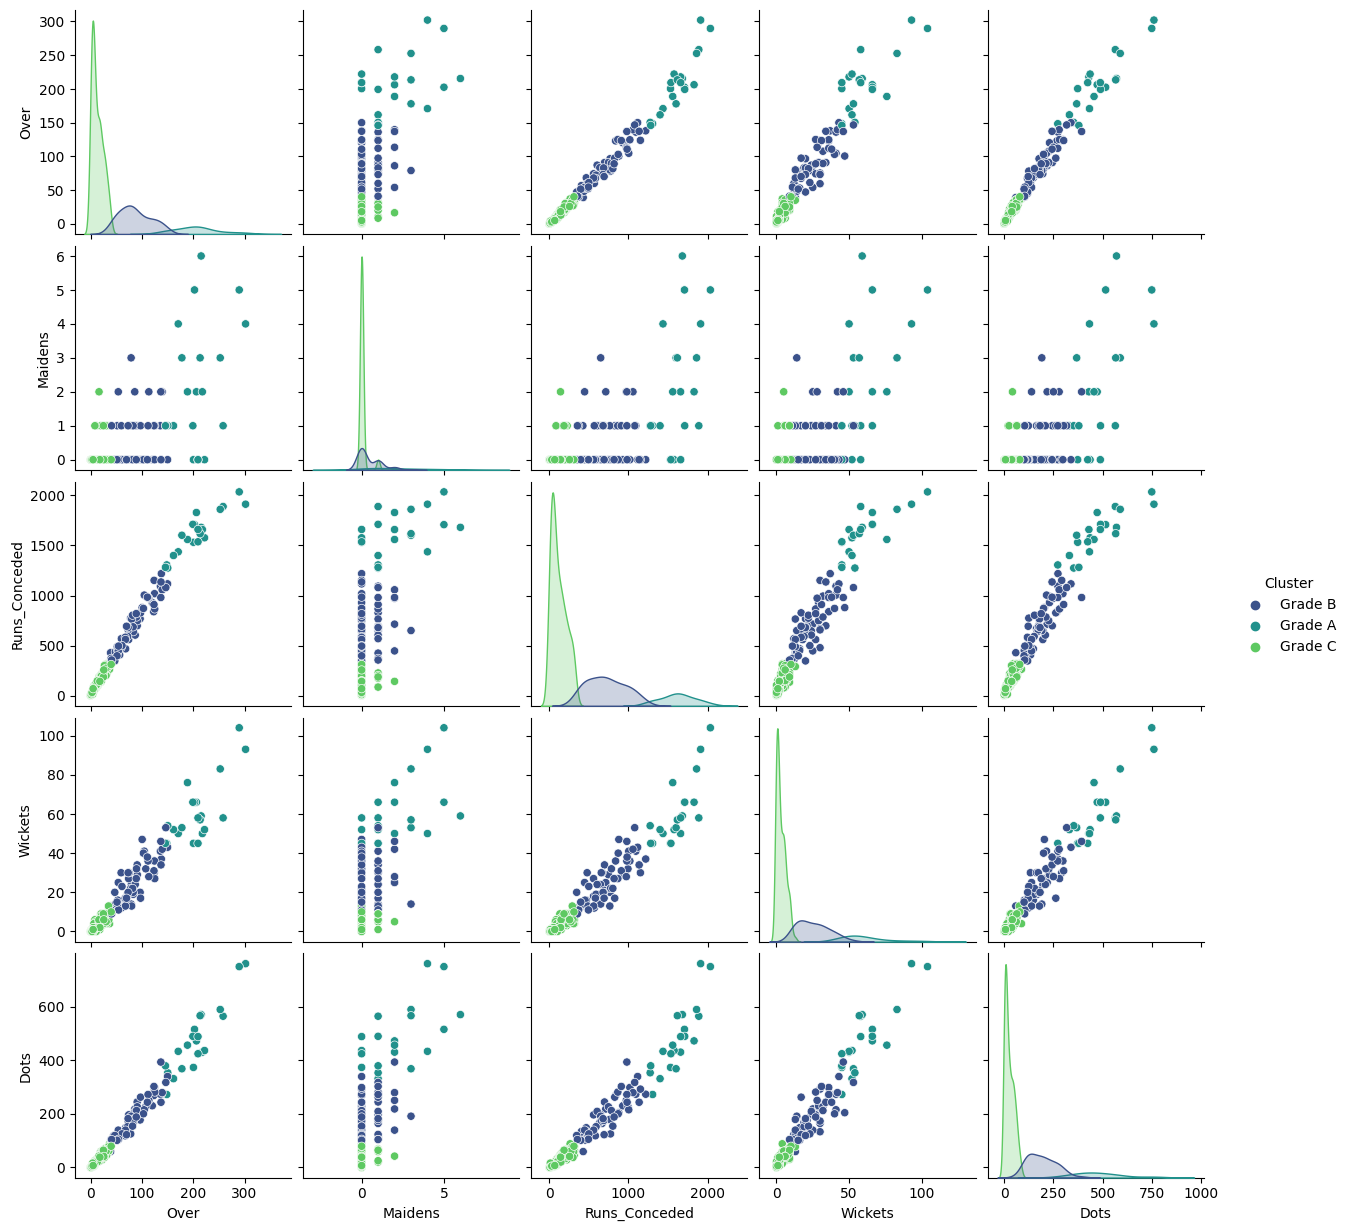

In [336]:
sns.pairplot(df_h2, hue='Cluster', palette='viridis')
plt.show()


## DB SCAN CLUSTERING

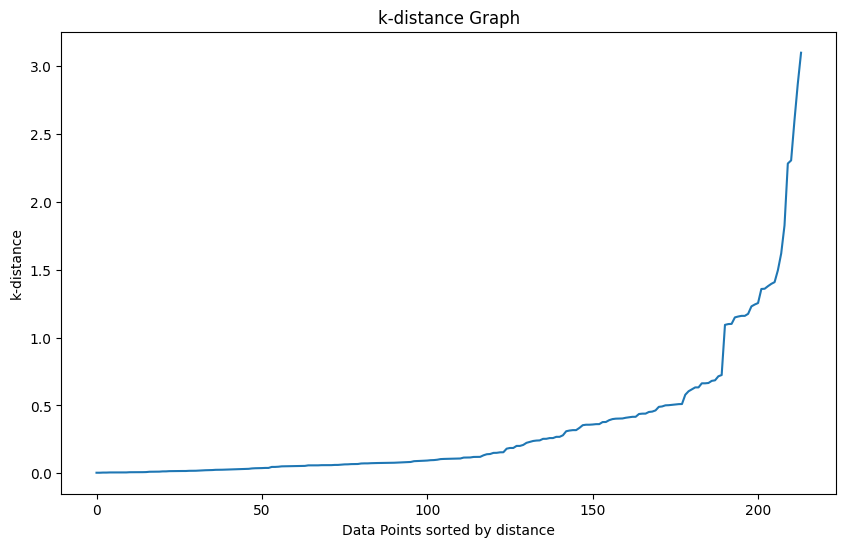

In [337]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db2.iloc[:, 1:5])

min_samples = 5


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)

distances, indices = neighbors_fit.kneighbors(X_train_scaled)
distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 24
Silhouette Score: 0.43


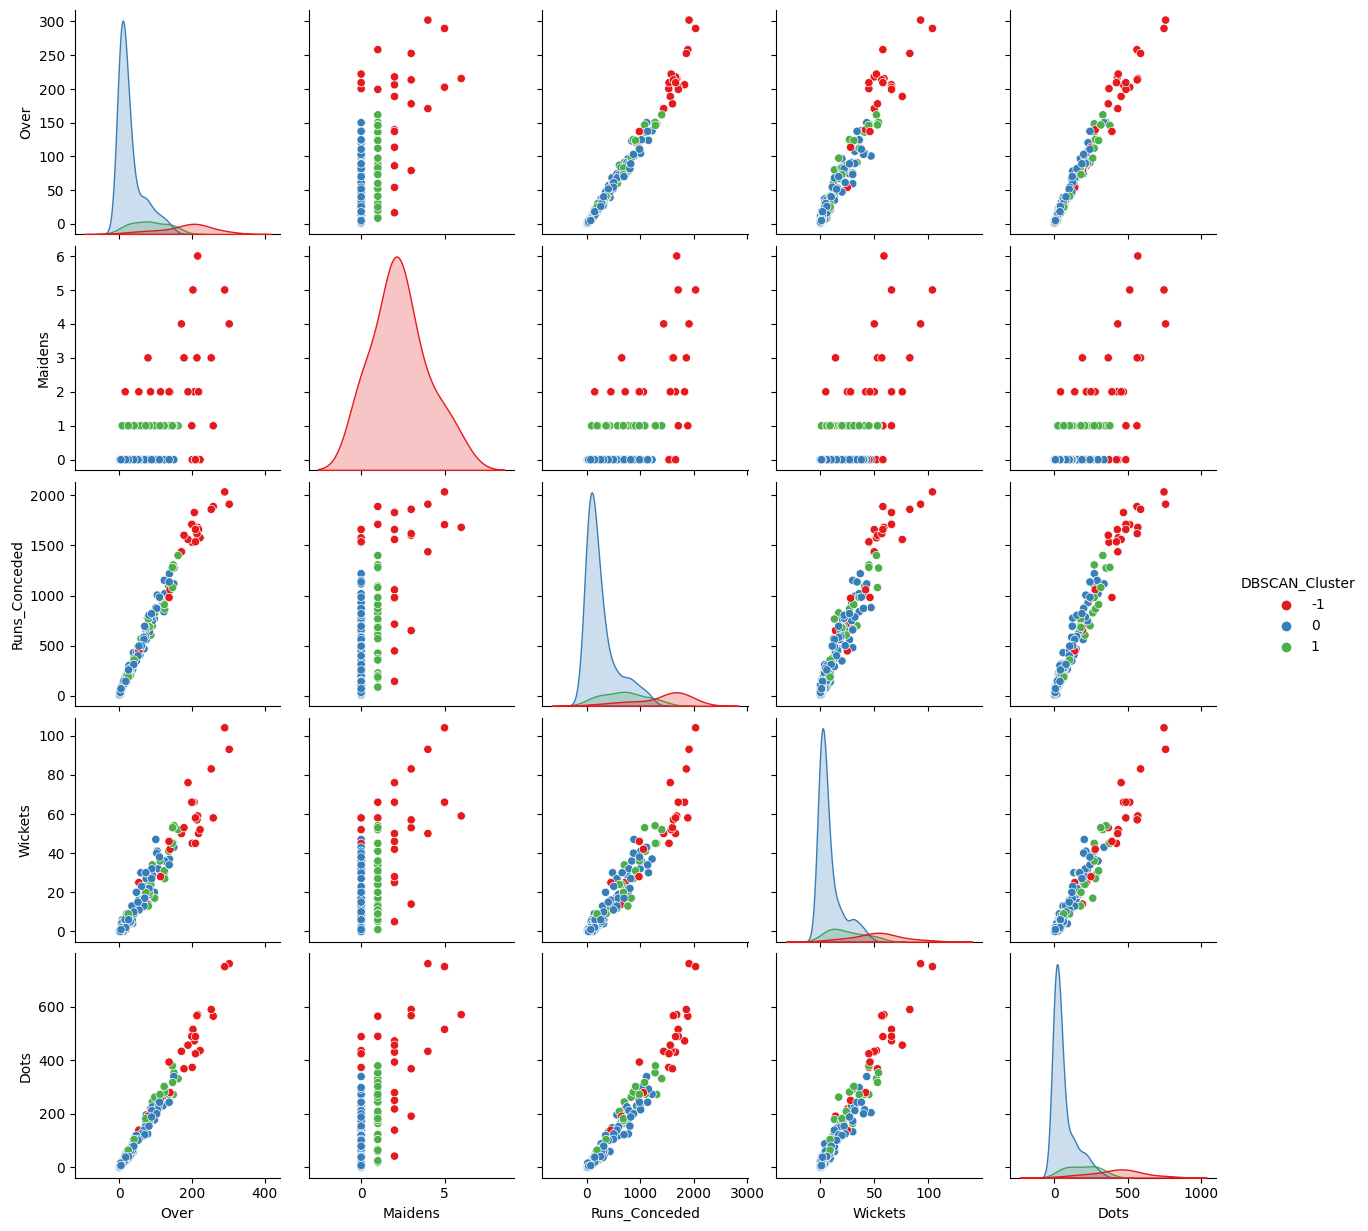

In [338]:
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

df_db2['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")
    
sns.pairplot(df_db2, hue='DBSCAN_Cluster', palette='Set1')
plt.show()